In [1]:
import pandas as pd
import pdfplumber

In [2]:
file = 'cms_training.pdf'
pdf = pdfplumber.open(file)

In [3]:
def deret(x):
    start = 0
    new_list = []
    for i in x:
        end_idx = x.find(' \n', start)
        if end_idx == -1: 
            new_list = new_list + [x[max(0,start-1):]]
            break
        new_list = new_list + [x[max(0,start-1):end_idx]]
        start = end_idx + 3
    return new_list  

### CHD 

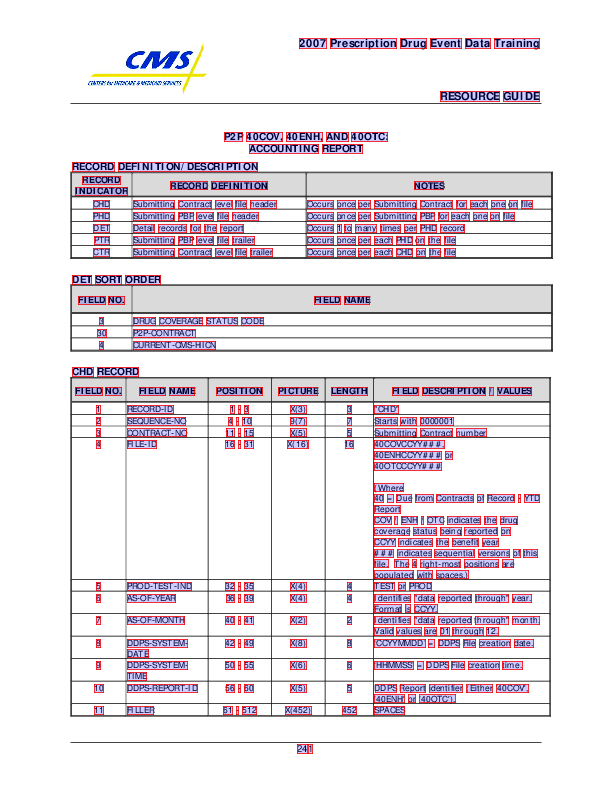

,0,1,2,3,4,5
0,,,,,,
1,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES
2,,,,,,
3,1,RECORD-ID,1 - 3,X(3),3,"""CHD"""
4,2,SEQUENCE-NO,4 - 10,9(7),7,Starts with 0000001
5,3,CONTRACT-NO,11 - 15,X(5),5,Submitting Contract number
6,4,FILE-ID,16 - 31,X(16),16,"40COVCCYY###, \n40ENHCCYY### or \n40OTCCCYY###..."
7,5,PROD-TEST-IND,32 - 35,X(4),4,TEST or PROD
8,6,AS-OF-YEAR,36 - 39,X(4),4,"Identifies ""data reported through"" year. \nFo..."
9,7,AS-OF-MONTH,40 - 41,X(2),2,"Identifies ""data reported through"" month. \nV..."


In [4]:
page_x = pdf.pages[292]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_table())
display(df)

In [5]:
col_names = df.loc[1,:].values
df.columns = col_names
df = df[3:].reset_index(drop = True)
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
#df['LENGTH'] = (pd.to_numeric(df['END_POSITION']) - pd.to_numeric(df['START_POSITION']) + 1).astype(str)
df = df[[ 'FIELD NO.',
         'FIELD NAME',
         'POSITION',
         'PICTURE',
         'LENGTH',
         'FIELD DESCRIPTION / VALUES',
         'START_POSITION',
         'END_POSITION']]

df['RECORD'] = 'chd'
chd = df
display(chd)

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD
0,1,RECORD-ID,1 - 3,X(3),3,"""CHD""",1,3,chd
1,2,SEQUENCE-NO,4 - 10,9(7),7,Starts with 0000001,4,10,chd
2,3,CONTRACT-NO,11 - 15,X(5),5,Submitting Contract number,11,15,chd
3,4,FILE-ID,16 - 31,X(16),16,"40COVCCYY###, 40ENHCCYY### or 40OTCCCYY### (W...",16,31,chd
4,5,PROD-TEST-IND,32 - 35,X(4),4,TEST or PROD,32,35,chd
5,6,AS-OF-YEAR,36 - 39,X(4),4,"Identifies ""data reported through"" year. Form...",36,39,chd
6,7,AS-OF-MONTH,40 - 41,X(2),2,"Identifies ""data reported through"" month. Val...",40,41,chd
7,8,DDPS-SYSTEM-DATE,42 - 49,X(8),8,‘CCYYMMDD’ = DDPS File creation date.,42,49,chd
8,9,DDPS-SYSTEM-TIME,50 - 55,X(6),6,‘HHMMSS’ = DDPS File creation time.,50,55,chd
9,10,DDPS-REPORT-ID,56 - 60,X(5),5,"DDPS Report identifier (Either '40COV', '40ENH...",56,60,chd


In [6]:
chd.to_csv('chd.csv', index=False)

### PHD 

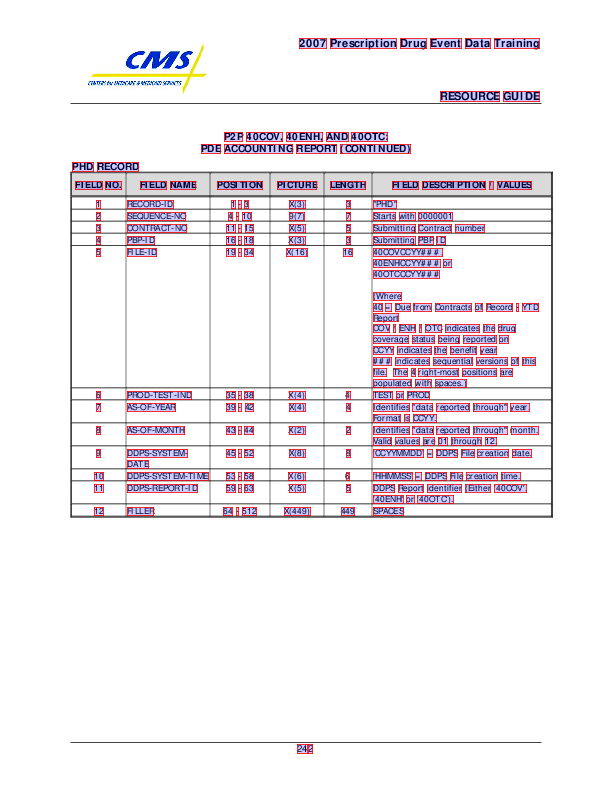

,0,1,2,3,4,5
0,,,,,,
1,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES
2,,,,,,
3,1,RECORD-ID,1 - 3,X(3),3 \n7 \n5 \n3 \n16 \n4 \n4 \n2 \n8 \n6 \n5 \n449,"""PHD"""
4,2,SEQUENCE-NO,4 - 10,9(7),None,Starts with 0000001
5,3,CONTRACT-NO,11 - 15,X(5),None,Submitting Contract number
6,4,PBP-ID,16 - 18,X(3),None,Submitting PBP ID
7,5,FILE-ID,19 - 34,X(16),None,"40COVCCYY###, \n40ENHCCYY### or \n40OTCCCYY###..."
8,6,PROD-TEST-IND,35 - 38,X(4),None,TEST or PROD
9,7,AS-OF-YEAR,39 - 42,X(4),None,"Identifies ""data reported through"" year. \nFo..."


In [7]:
page_x = pdf.pages[293]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_table())
display(df)

In [8]:
df.columns = col_names
df = df[3:].reset_index(drop = True)
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
df['LENGTH'] =  pd.Series(deret(df.iloc[0,4]))
#(pd.to_numeric(df['END_POSITION']) - pd.to_numeric(df['START_POSITION']) + 1).astype(str)
#non-generic
df = df[[ 'FIELD NO.',
         'FIELD NAME',
         'POSITION',
         'PICTURE',
         'LENGTH',
         'FIELD DESCRIPTION / VALUES',
         'START_POSITION',
         'END_POSITION']]
df['RECORD'] = 'phd'
phd = df
display(phd)

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD
0,1,RECORD-ID,1 - 3,X(3),3,"""PHD""",1,3,phd
1,2,SEQUENCE-NO,4 - 10,9(7),7,Starts with 0000001,4,10,phd
2,3,CONTRACT-NO,11 - 15,X(5),5,Submitting Contract number,11,15,phd
3,4,PBP-ID,16 - 18,X(3),3,Submitting PBP ID,16,18,phd
4,5,FILE-ID,19 - 34,X(16),16,"40COVCCYY###, 40ENHCCYY### or 40OTCCCYY### (W...",19,34,phd
5,6,PROD-TEST-IND,35 - 38,X(4),4,TEST or PROD,35,38,phd
6,7,AS-OF-YEAR,39 - 42,X(4),4,"Identifies ""data reported through"" year. Form...",39,42,phd
7,8,AS-OF-MONTH,43 - 44,X(2),2,"Identifies ""data reported through"" month. Val...",43,44,phd
8,9,DDPS-SYSTEM-DATE,45 - 52,X(8),8,‘CCYYMMDD’ = DDPS File creation date.,45,52,phd
9,10,DDPS-SYSTEM-TIME,53 - 58,X(6),6,‘HHMMSS’ = DDPS File creation time.,53,58,phd


In [9]:
phd.to_csv('phd.csv', index=False)

In [10]:
deret(df.iloc[3,4])

['3']

### DET

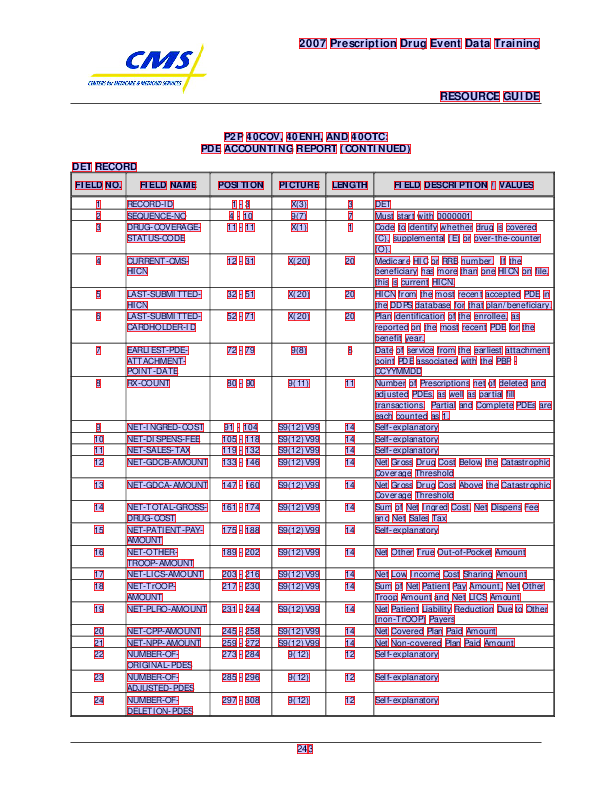

,0,1,2,3,4,5
0,,,,,,FIELD DESCRIPTION / VALUES
1,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,None
2,,,,,,None
3,1,RECORD-ID,1 - 3,X(3),3,DET
4,2,SEQUENCE-NO,4 - 10,9(7),7,Must start with 0000001
5,3,DRUG-COVERAGE-\nSTATUS-CODE,11 - 11,X(1),1,Code to identify whether drug is covered \n(C)...
6,4,CURRENT-CMS-\nHICN,12 - 31,X(20),20,Medicare HIC or RRB number. If the \nbenefici...
7,5,LAST-SUBMITTED-\nHICN,32 - 51,X(20),20,HICN from the most recent accepted PDE in \nth...
8,6,LAST-SUBMITTED-\nCARDHOLDER-ID,52 - 71,X(20),20,"Plan identification of the enrollee, as \nrepo..."
9,7,EARLIEST-PDE-\nATTACHMENT-\nPOINT-DATE,72 - 79,9(8),8,Date of service from the earliest attachment \...


In [11]:
page_x = pdf.pages[294]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_tables()[0])
display(df)

In [12]:
df.columns = col_names
df = df[3:].reset_index(drop = True)
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
#df['LENGTH'] = (pd.to_numeric(df['END_POSITION']) - pd.to_numeric(df['START_POSITION']) + 1).astype(str)
#non-generic
df['RECORD'] = 'det'
det1 = df
display(det1)

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD
0,1,RECORD-ID,1 - 3,X(3),3,DET,1,3,det
1,2,SEQUENCE-NO,4 - 10,9(7),7,Must start with 0000001,4,10,det
2,3,DRUG-COVERAGE-STATUS-CODE,11 - 11,X(1),1,"Code to identify whether drug is covered (C), ...",11,11,det
3,4,CURRENT-CMS-HICN,12 - 31,X(20),20,Medicare HIC or RRB number. If the beneficiar...,12,31,det
4,5,LAST-SUBMITTED-HICN,32 - 51,X(20),20,HICN from the most recent accepted PDE in the ...,32,51,det
5,6,LAST-SUBMITTED-CARDHOLDER-ID,52 - 71,X(20),20,"Plan identification of the enrollee, as report...",52,71,det
6,7,EARLIEST-PDE-ATTACHMENT-POINT-DATE,72 - 79,9(8),8,Date of service from the earliest attachment p...,72,79,det
7,8,RX-COUNT,80 - 90,9(11),11,Number of Prescriptions net of deleted and adj...,80,90,det
8,9,NET-INGRED-COST,91 - 104,S9(12)V99,14,Self-explanatory,91,104,det
9,10,NET-DISPENS-FEE,105 - 118,S9(12)V99,14,Self-explanatory,105,118,det


In [13]:
det1.to_csv('det1.csv', index=False)

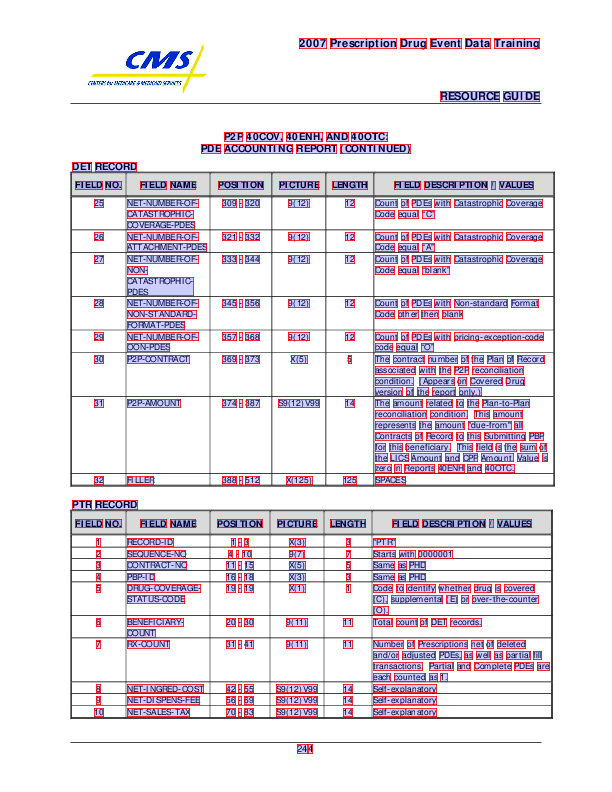

,0,1,2,3,4,5
0,,,,,,FIELD DESCRIPTION / VALUES
1,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,None
2,,,,,,None
3,25,NET-NUMBER-OF-\nCATASTROPHIC-\nCOVERAGE-PDES,309 - 320,9(12),12,Count of PDEs with Catastrophic Coverage \nCod...
4,26,NET-NUMBER-OF-\nATTACHMENT-PDES,321 - 332,9(12),12,Count of PDEs with Catastrophic Coverage \nCod...
5,27,NET-NUMBER-OF-\nNON-\nCATASTROPHIC-\nPDES,333 - 344,9(12),12,Count of PDEs with Catastrophic Coverage \nCod...
6,28,NET-NUMBER-OF-\nNON-STANDARD-\nFORMAT-PDES,345 - 356,9(12),12,Count of PDEs with Non-standard Format \nCode ...
7,29,NET-NUMBER-OF-\nOON-PDES,357 - 368,9(12),12,Count of PDEs with pricing-exception-code \nco...
8,30,P2P-CONTRACT,369 - 373,X(5),5,The contract number of the Plan of Record \nas...
9,31,P2P-AMOUNT,374 - 387,S9(12)V99,14,The amount related to the Plan-to-Plan \nrecon...


In [14]:
page_x = pdf.pages[295]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_tables()[0])
display(df)

In [15]:
df.columns = col_names
df = df[3:].reset_index(drop = True)
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
#df['LENGTH'] = (pd.to_numeric(df['END_POSITION']) - pd.to_numeric(df['START_POSITION']) + 1).astype(str)
#non-generic
df['RECORD'] = 'det'
det2 = df
display(det2)

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD
0,25,NET-NUMBER-OF-CATASTROPHIC-COVERAGE-PDES,309 - 320,9(12),12,Count of PDEs with Catastrophic Coverage Code ...,309,320,det
1,26,NET-NUMBER-OF-ATTACHMENT-PDES,321 - 332,9(12),12,Count of PDEs with Catastrophic Coverage Code ...,321,332,det
2,27,NET-NUMBER-OF-NON-CATASTROPHIC-PDES,333 - 344,9(12),12,Count of PDEs with Catastrophic Coverage Code ...,333,344,det
3,28,NET-NUMBER-OF-NON-STANDARD-FORMAT-PDES,345 - 356,9(12),12,Count of PDEs with Non-standard Format Code ot...,345,356,det
4,29,NET-NUMBER-OF-OON-PDES,357 - 368,9(12),12,Count of PDEs with pricing-exception-code code...,357,368,det
5,30,P2P-CONTRACT,369 - 373,X(5),5,The contract number of the Plan of Record asso...,369,373,det
6,31,P2P-AMOUNT,374 - 387,S9(12)V99,14,The amount related to the Plan-to-Plan reconci...,374,387,det
7,32,FILLER,388 - 512,X(125),125,SPACES,388,512,det


In [16]:
det2.to_csv('det2.csv', index=False)

### PTR

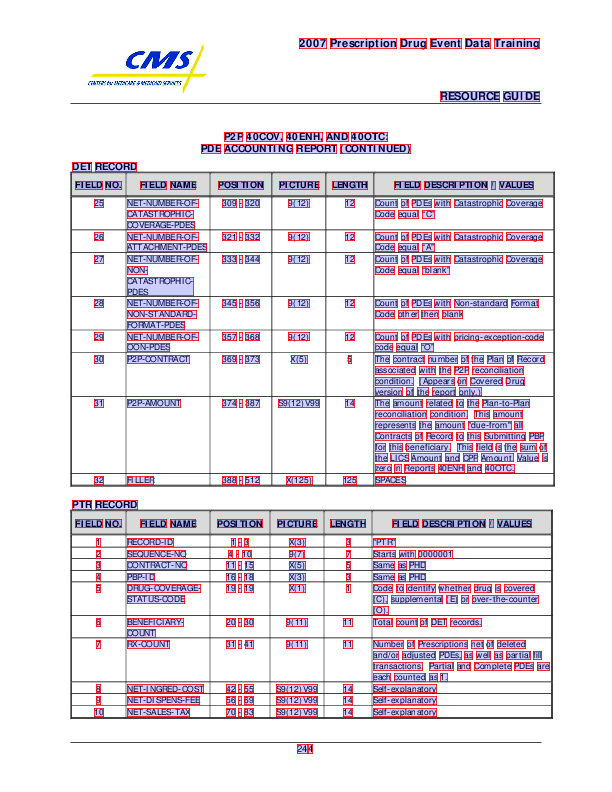

,0,1,2,3,4,5
0,,,,,,
1,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES
2,,,,,,
3,1,RECORD-ID,1 - 3,X(3),3 \n7 \n5 \n3 \n1 \n11 \n11 \n14 \n14 \n14,"""PTR"""
4,2,SEQUENCE-NO,4 - 10,9(7),None,Starts with 0000001
5,3,CONTRACT-NO,11 - 15,X(5),None,Same as PHD
6,4,PBP-ID,16 - 18,X(3),None,Same as PHD
7,5,DRUG-COVERAGE-\nSTATUS-CODE,19 - 19,X(1),None,Code to identify whether drug is covered \n(C)...
8,6,BENEFICIARY-\nCOUNT,20 - 30,9(11),None,Total count of DET records.
9,7,RX-COUNT,31 - 41,9(11),None,Number of Prescriptions net of deleted \nand/o...


In [17]:
page_x = pdf.pages[295]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_tables()[1])
display(df)

In [18]:
df.columns = col_names
df = df[3:].reset_index(drop = True)
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
df['LENGTH'] =  pd.Series(deret(df.iloc[0,4]))
df = df[[ 'FIELD NO.',
         'FIELD NAME',
         'POSITION',
         'PICTURE',
         'LENGTH',
         'FIELD DESCRIPTION / VALUES',
         'START_POSITION',
         'END_POSITION']]
df['RECORD'] = 'ptr'
ptr1 = df
display(ptr1)

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD
0,1,RECORD-ID,1 - 3,X(3),3,"""PTR""",1,3,ptr
1,2,SEQUENCE-NO,4 - 10,9(7),7,Starts with 0000001,4,10,ptr
2,3,CONTRACT-NO,11 - 15,X(5),5,Same as PHD,11,15,ptr
3,4,PBP-ID,16 - 18,X(3),3,Same as PHD,16,18,ptr
4,5,DRUG-COVERAGE-STATUS-CODE,19 - 19,X(1),1,"Code to identify whether drug is covered (C), ...",19,19,ptr
5,6,BENEFICIARY-COUNT,20 - 30,9(11),11,Total count of DET records.,20,30,ptr
6,7,RX-COUNT,31 - 41,9(11),11,Number of Prescriptions net of deleted and/or ...,31,41,ptr
7,8,NET-INGRED-COST,42 - 55,S9(12)V99,14,Self-explanatory,42,55,ptr
8,9,NET-DISPENS-FEE,56 - 69,S9(12)V99,14,Self-explanatory,56,69,ptr
9,10,NET-SALES-TAX,70 - 83,S9(12)V99,14,Self-explanatory,70,83,ptr


In [19]:
ptr1.to_csv('ptr1.csv', index=False)

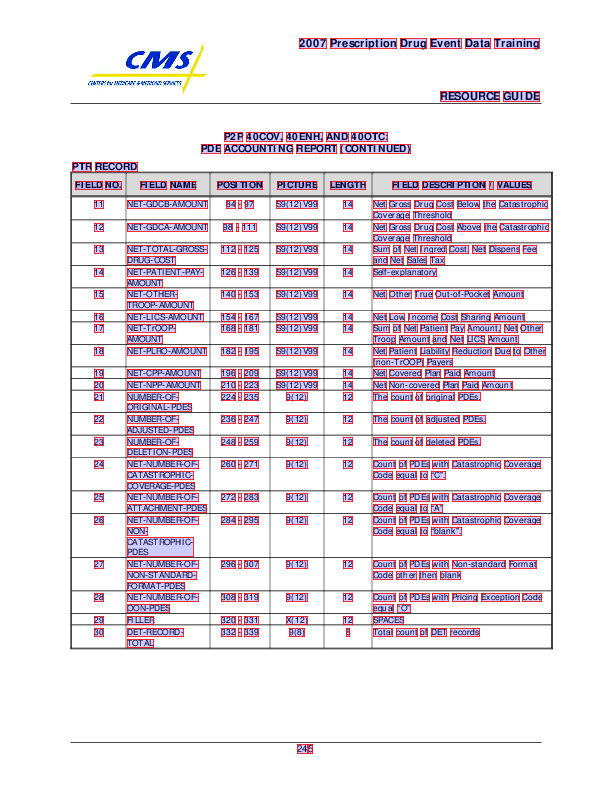

,0,1,2,3,4,5
0,,,,,,
1,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES
2,,,,,,
3,11,NET-GDCB-AMOUNT,84 - 97,S9(12)V99,14 \n14 \n14 \n14 \n14 \n14 \n14 \n14 \n14 \n1...,Net Gross Drug Cost Below the Catastrophic \nC...
4,12,NET-GDCA-AMOUNT,98 - 111,S9(12)V99,None,Net Gross Drug Cost Above the Catastrophic \nC...
5,13,NET-TOTAL-GROSS-\nDRUG-COST,112 - 125,S9(12)V99,None,"Sum of Net Ingred Cost, Net Dispens Fee \nand ..."
6,14,NET-PATIENT-PAY-\nAMOUNT,126 - 139,S9(12)V99,None,Self-explanatory
7,15,NET-OTHER-\nTROOP-AMOUNT,140 - 153,S9(12)V99,None,Net Other True Out-of-Pocket Amount
8,16,NET-LICS-AMOUNT,154 - 167,S9(12)V99,None,Net Low Income Cost Sharing Amount
9,17,NET-TrOOP-\nAMOUNT,168 - 181,S9(12)V99,None,"Sum of Net Patient Pay Amount, Net Other \nTro..."


In [20]:
page_x = pdf.pages[296]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_table())
display(df)

In [21]:
df.columns = col_names
df = df[3:].reset_index(drop = True)
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
df['LENGTH'] =  pd.Series(deret(df.iloc[0,4]))
df = df[[ 'FIELD NO.',
         'FIELD NAME',
         'POSITION',
         'PICTURE',
         'LENGTH',
         'FIELD DESCRIPTION / VALUES',
         'START_POSITION',
         'END_POSITION']]
#non-generic
df['RECORD'] = 'ptr'
ptr2 = df
display(ptr2)

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD
0,11,NET-GDCB-AMOUNT,84 - 97,S9(12)V99,14,Net Gross Drug Cost Below the Catastrophic Cov...,84,97,ptr
1,12,NET-GDCA-AMOUNT,98 - 111,S9(12)V99,14,Net Gross Drug Cost Above the Catastrophic Cov...,98,111,ptr
2,13,NET-TOTAL-GROSS-DRUG-COST,112 - 125,S9(12)V99,14,"Sum of Net Ingred Cost, Net Dispens Fee and Ne...",112,125,ptr
3,14,NET-PATIENT-PAY-AMOUNT,126 - 139,S9(12)V99,14,Self-explanatory,126,139,ptr
4,15,NET-OTHER-TROOP-AMOUNT,140 - 153,S9(12)V99,14,Net Other True Out-of-Pocket Amount,140,153,ptr
5,16,NET-LICS-AMOUNT,154 - 167,S9(12)V99,14,Net Low Income Cost Sharing Amount,154,167,ptr
6,17,NET-TrOOP-AMOUNT,168 - 181,S9(12)V99,14,"Sum of Net Patient Pay Amount, Net Other Troop...",168,181,ptr
7,18,NET-PLRO-AMOUNT,182 - 195,S9(12)V99,14,Net Patient Liability Reduction Due to Other (...,182,195,ptr
8,19,NET-CPP-AMOUNT,196 - 209,S9(12)V99,14,Net Covered Plan Paid Amount,196,209,ptr
9,20,NET-NPP-AMOUNT,210 - 223,S9(12)V99,14,Net Non-covered Plan Paid Amount,210,223,ptr


In [22]:
ptr2.to_csv('ptr2.csv', index=False)

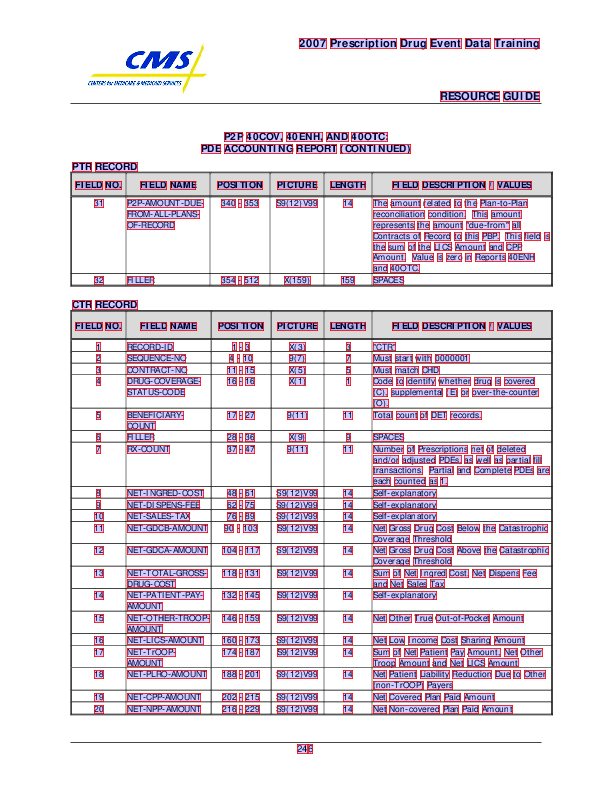

,0,1,2,3,4,5
0,,,,,,
1,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES
2,,,,,,
3,31,P2P-AMOUNT-DUE-\nFROM-ALL-PLANS-\nOF-RECORD,340 - 353,S9(12)V99,14 \n159,The amount related to the Plan-to-Plan \nrecon...
4,32,FILLER,354 - 512,X(159),None,SPACES


In [23]:
page_x = pdf.pages[297]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_tables()[0])
display(df)

In [24]:
df.columns = col_names
df = df[3:].reset_index(drop = True)
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
df['LENGTH'] =  pd.Series(deret(df.iloc[0,4]))
df = df[[ 'FIELD NO.',
         'FIELD NAME',
         'POSITION',
         'PICTURE',
         'LENGTH',
         'FIELD DESCRIPTION / VALUES',
         'START_POSITION',
         'END_POSITION']]

#non-generic
df['RECORD'] = 'ptr'
ptr3 = df
display(ptr3)

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD
0,31,P2P-AMOUNT-DUE-FROM-ALL-PLANS-OF-RECORD,340 - 353,S9(12)V99,14,The amount related to the Plan-to-Plan reconci...,340,353,ptr
1,32,FILLER,354 - 512,X(159),159,SPACES,354,512,ptr


In [25]:
ptr3.to_csv('ptr3.csv', index=False)

### CTR

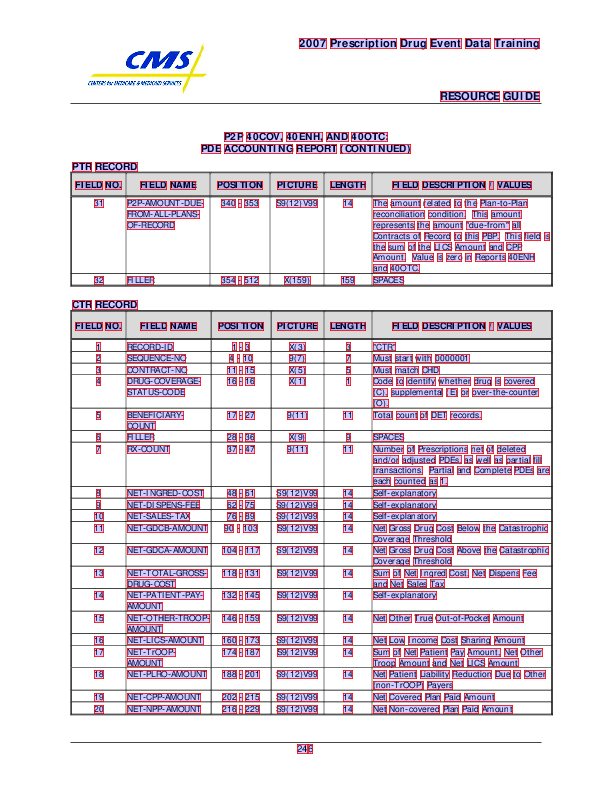

,0,1,2,3,4,5
0,,,,,,
1,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES
2,,,,,,
3,1,RECORD-ID,1 - 3,X(3),3 \n7 \n5 \n1 \n11 \n9 \n11 \n14 \n14 \n14 \n1...,"""CTR"""
4,2,SEQUENCE-NO,4 - 10,9(7),None,Must start with 0000001
5,3,CONTRACT-NO,11 - 15,X(5),None,Must match CHD
6,4,DRUG-COVERAGE-\nSTATUS-CODE,16 - 16,X(1),None,Code to identify whether drug is covered \n(C)...
7,5,BENEFICIARY-\nCOUNT,17 - 27,9(11),None,Total count of DET records.
8,6,FILLER,28 - 36,X(9),None,SPACES
9,7,RX-COUNT,37 - 47,9(11),None,Number of Prescriptions net of deleted \nand/o...


In [26]:
page_x = pdf.pages[297]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_tables()[1])
display(df)

In [27]:
df.columns = col_names
df = df[3:].reset_index(drop = True)
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
bad_index = mid[mid == -1].index
mid[bad_index] = df.loc[bad_index,'POSITION'].str.find(' – ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
df['LENGTH'] =  pd.Series(deret(df.iloc[0,4]))
df = df[[ 'FIELD NO.',
         'FIELD NAME',
         'POSITION',
         'PICTURE',
         'LENGTH',
         'FIELD DESCRIPTION / VALUES',
         'START_POSITION',
         'END_POSITION']]

#non-generic
df['RECORD'] = 'ctr'
ctr1 = df
display(ctr1)

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD
0,1,RECORD-ID,1 - 3,X(3),3,"""CTR""",1,3,ctr
1,2,SEQUENCE-NO,4 - 10,9(7),7,Must start with 0000001,4,10,ctr
2,3,CONTRACT-NO,11 - 15,X(5),5,Must match CHD,11,15,ctr
3,4,DRUG-COVERAGE-STATUS-CODE,16 - 16,X(1),1,"Code to identify whether drug is covered (C), ...",16,16,ctr
4,5,BENEFICIARY-COUNT,17 - 27,9(11),11,Total count of DET records.,17,27,ctr
5,6,FILLER,28 - 36,X(9),9,SPACES,28,36,ctr
6,7,RX-COUNT,37 - 47,9(11),11,Number of Prescriptions net of deleted and/or ...,37,47,ctr
7,8,NET-INGRED-COST,48 - 61,S9(12)V99,14,Self-explanatory,48,61,ctr
8,9,NET-DISPENS-FEE,62 - 75,S9(12)V99,14,Self-explanatory,62,75,ctr
9,10,NET-SALES-TAX,76 - 89,S9(12)V99,14,Self-explanatory,76,89,ctr


In [28]:
ctr1.to_csv('ctr1.csv', index=False)

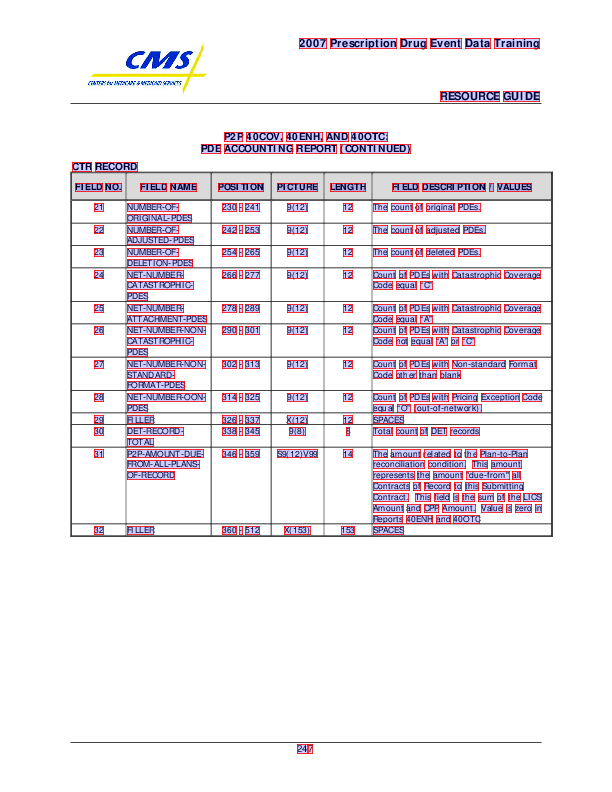

,0,1,2,3,4,5
0,,,,,,
1,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES
2,,,,,,
3,21,NUMBER-OF-\nORIGINAL-PDES,230 - 241,9(12),12 \n12 \n12 \n12 \n12 \n12 \n12 \n12 \n12 \n8...,The count of original PDEs.
4,22,NUMBER-OF-\nADJUSTED-PDES,242 - 253,9(12),None,The count of adjusted PDEs.
5,23,NUMBER-OF-\nDELETION-PDES,254 - 265,9(12),None,The count of deleted PDEs.
6,24,NET-NUMBER-\nCATASTROPHIC-\nPDES,266 - 277,9(12),None,Count of PDEs with Catastrophic Coverage \nCod...
7,25,NET-NUMBER-\nATTACHMENT-PDES,278 - 289,9(12),None,Count of PDEs with Catastrophic Coverage \nCod...
8,26,NET-NUMBER-NON-\nCATASTROPHIC-\nPDES,290 - 301,9(12),None,Count of PDEs with Catastrophic Coverage \nCod...
9,27,NET-NUMBER-NON-\nSTANDARD-\nFORMAT-PDES,302 - 313,9(12),None,Count of PDEs with Non-standard Format \nCode ...


In [29]:
page_x = pdf.pages[298]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_tables()[0])
display(df)

In [30]:
df.columns = col_names
df = df[3:].reset_index(drop = True)
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
bad_index = mid[mid == -1].index
mid[bad_index] = df.loc[bad_index,'POSITION'].str.find(' – ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
df['LENGTH'] =  pd.Series(deret(df.iloc[0,4]))
df = df[[ 'FIELD NO.',
         'FIELD NAME',
         'POSITION',
         'PICTURE',
         'LENGTH',
         'FIELD DESCRIPTION / VALUES',
         'START_POSITION',
         'END_POSITION']]
#non-generic
df['RECORD'] = 'ctr'
ctr2 = df
display(ctr2)

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD
0,21,NUMBER-OF-ORIGINAL-PDES,230 - 241,9(12),12,The count of original PDEs.,230,241,ctr
1,22,NUMBER-OF-ADJUSTED-PDES,242 - 253,9(12),12,The count of adjusted PDEs.,242,253,ctr
2,23,NUMBER-OF-DELETION-PDES,254 - 265,9(12),12,The count of deleted PDEs.,254,265,ctr
3,24,NET-NUMBER-CATASTROPHIC-PDES,266 - 277,9(12),12,Count of PDEs with Catastrophic Coverage Code ...,266,277,ctr
4,25,NET-NUMBER-ATTACHMENT-PDES,278 - 289,9(12),12,Count of PDEs with Catastrophic Coverage Code ...,278,289,ctr
5,26,NET-NUMBER-NON-CATASTROPHIC-PDES,290 - 301,9(12),12,Count of PDEs with Catastrophic Coverage Code ...,290,301,ctr
6,27,NET-NUMBER-NON-STANDARD-FORMAT-PDES,302 - 313,9(12),12,Count of PDEs with Non-standard Format Code ot...,302,313,ctr
7,28,NET-NUMBER-OON-PDES,314 - 325,9(12),12,Count of PDEs with Pricing Exception Code equa...,314,325,ctr
8,29,FILLER,326 - 337,X(12),12,SPACES,326,337,ctr
9,30,DET-RECORD-TOTAL,338 - 345,9(8),8,Total count of DET records,338,345,ctr


In [31]:
ctr2.to_csv('ctr2.csv', index=False)

In [32]:
cms_dfs = [chd,phd,det1,det2,ptr1,ptr2,ptr3,ctr1,ctr2]
cms_df = cms_dfs[0].append(cms_dfs[1:])
cms_df = cms_df.reset_index(drop=True)
#for dfx in cms_dfs[1:]:
#    cms_df


In [33]:
#cms_df[['40COV', '40ENH','40OTC']] #= True
cms_df[['DOCUMENT']] = '40COV, 40ENH, 40OTC'

In [34]:
cms_df[:50]

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD,DOCUMENT
0,1,RECORD-ID,1 - 3,X(3),3,"""CHD""",1,3,chd,"40COV, 40ENH, 40OTC"
1,2,SEQUENCE-NO,4 - 10,9(7),7,Starts with 0000001,4,10,chd,"40COV, 40ENH, 40OTC"
2,3,CONTRACT-NO,11 - 15,X(5),5,Submitting Contract number,11,15,chd,"40COV, 40ENH, 40OTC"
3,4,FILE-ID,16 - 31,X(16),16,"40COVCCYY###, 40ENHCCYY### or 40OTCCCYY### (W...",16,31,chd,"40COV, 40ENH, 40OTC"
4,5,PROD-TEST-IND,32 - 35,X(4),4,TEST or PROD,32,35,chd,"40COV, 40ENH, 40OTC"
5,6,AS-OF-YEAR,36 - 39,X(4),4,"Identifies ""data reported through"" year. Form...",36,39,chd,"40COV, 40ENH, 40OTC"
6,7,AS-OF-MONTH,40 - 41,X(2),2,"Identifies ""data reported through"" month. Val...",40,41,chd,"40COV, 40ENH, 40OTC"
7,8,DDPS-SYSTEM-DATE,42 - 49,X(8),8,‘CCYYMMDD’ = DDPS File creation date.,42,49,chd,"40COV, 40ENH, 40OTC"
8,9,DDPS-SYSTEM-TIME,50 - 55,X(6),6,‘HHMMSS’ = DDPS File creation time.,50,55,chd,"40COV, 40ENH, 40OTC"
9,10,DDPS-REPORT-ID,56 - 60,X(5),5,"DDPS Report identifier (Either '40COV', '40ENH...",56,60,chd,"40COV, 40ENH, 40OTC"


In [35]:

cms_df.to_csv('cms_df.csv', index=False)
cms_df.to_excel('cms_df.xlsx', index=False)

In [36]:
cms_dfs2 = []

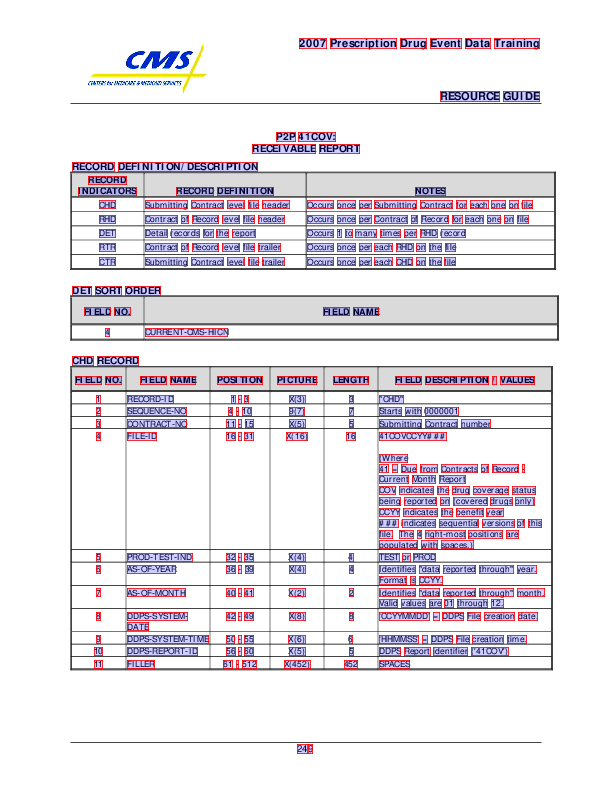

,0,1,2,3,4,5
0,,,,,LENGTH,
1,FIELD NO.,FIELD NAME,POSITION,PICTURE,None,FIELD DESCRIPTION / VALUES
2,,,,,None,
3,1,RECORD-ID,1 - 3,X(3),3 \n7 \n5 \n16 \n4 \n4 \n2 \n8 \n6 \n5 \n452,"""CHD"""
4,2,SEQUENCE-NO,4 - 10,9(7),None,Starts with 0000001
5,3,CONTRACT-NO,11 - 15,X(5),None,Submitting Contract number
6,4,FILE-ID,16 - 31,X(16),None,41COVCCYY### \n \n(Where \n41 = Due from Cont...
7,5,PROD-TEST-IND,32 - 35,X(4),None,TEST or PROD
8,6,AS-OF-YEAR,36 - 39,X(4),None,"Identifies ""data reported through"" year. \nFo..."
9,7,AS-OF-MONTH,40 - 41,X(2),None,"Identifies ""data reported through"" month. \nV..."


In [37]:
page_x = pdf.pages[302]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_tables()[2])
display(df)

In [38]:
df.columns = col_names
df = df[3:].reset_index(drop = True)
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
bad_index = mid[mid == -1].index
mid[bad_index] = df.loc[bad_index,'POSITION'].str.find(' – ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
df['LENGTH'] = (pd.to_numeric(df['END_POSITION']) - pd.to_numeric(df['START_POSITION']) + 1).astype(str)

#non-generic

df = df[[ 'FIELD NO.',
         'FIELD NAME',
         'POSITION',
         'PICTURE',
         'LENGTH',
         'FIELD DESCRIPTION / VALUES',
         'START_POSITION',
         'END_POSITION']]
df['RECORD'] = 'chd'
df[['DOCUMENT']] = '41COV'
display(df)
cov41_chd = df
cms_dfs2 = cms_dfs2 + [cov41_chd]

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD,DOCUMENT
0,1,RECORD-ID,1 - 3,X(3),3,"""CHD""",1,3,chd,41COV
1,2,SEQUENCE-NO,4 - 10,9(7),7,Starts with 0000001,4,10,chd,41COV
2,3,CONTRACT-NO,11 - 15,X(5),5,Submitting Contract number,11,15,chd,41COV
3,4,FILE-ID,16 - 31,X(16),16,41COVCCYY### (Where 41 = Due from Contracts ...,16,31,chd,41COV
4,5,PROD-TEST-IND,32 - 35,X(4),4,TEST or PROD,32,35,chd,41COV
5,6,AS-OF-YEAR,36 - 39,X(4),4,"Identifies ""data reported through"" year. Form...",36,39,chd,41COV
6,7,AS-OF-MONTH,40 - 41,X(2),2,"Identifies ""data reported through"" month. Val...",40,41,chd,41COV
7,8,DDPS-SYSTEM-DATE,42 - 49,X(8),8,‘CCYYMMDD’ = DDPS File creation date.,42,49,chd,41COV
8,9,DDPS-SYSTEM-TIME,50 - 55,X(6),6,‘HHMMSS’ = DDPS File creation time.,50,55,chd,41COV
9,10,DDPS-REPORT-ID,56 - 60,X(5),5,DDPS Report identifier ('41COV'),56,60,chd,41COV


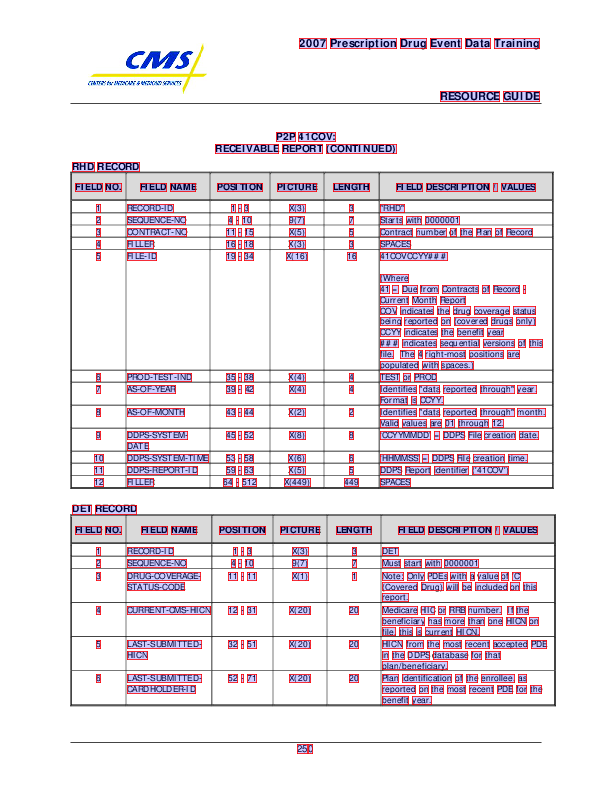

,0,1,2,3,4,5
0,,,,,,FIELD DESCRIPTION / VALUES
1,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,None
2,,,,,,None
3,1,RECORD-ID,1 - 3,X(3),3 \n7 \n5 \n3 \n16 \n4 \n4 \n2 \n8 \n6 \n5 \n449,"""RHD"" \nStarts with 0000001 \nContract number ..."
4,2,SEQUENCE-NO,4 - 10,9(7),None,None
5,3,CONTRACT-NO,11 - 15,X(5),None,None
6,4,FILLER,16 - 18,X(3),None,None
7,5,FILE-ID,19 - 34,X(16),None,None
8,6,PROD-TEST-IND,35 - 38,X(4),None,None
9,7,AS-OF-YEAR,39 - 42,X(4),None,None


In [39]:
page_x = pdf.pages[303]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_tables()[0])
display(df)

In [40]:
df.columns = col_names
df = df[3:].reset_index(drop = True)
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
df['FIELD DESCRIPTION / VALUES'] =  pd.Series(deret(df.iloc[0,5]))
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
bad_index = mid[mid == -1].index
mid[bad_index] = df.loc[bad_index,'POSITION'].str.find(' – ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
df['LENGTH'] =  pd.Series(deret(df.iloc[0,4]))
df = df[[ 'FIELD NO.',
         'FIELD NAME',
         'POSITION',
         'PICTURE',
         'LENGTH',
         'FIELD DESCRIPTION / VALUES',
         'START_POSITION',
         'END_POSITION']]

#non-generic
df['RECORD'] = 'rhd'
df[['DOCUMENT']] = '41COV'
display(df)
cov41_rhd = df
cms_dfs2 = cms_dfs2 + [cov41_rhd]

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD,DOCUMENT
0,1,RECORD-ID,1 - 3,X(3),3,"""RHD""",1,3,rhd,41COV
1,2,SEQUENCE-NO,4 - 10,9(7),7,Starts with 0000001,4,10,rhd,41COV
2,3,CONTRACT-NO,11 - 15,X(5),5,Contract number of the Plan of Record,11,15,rhd,41COV
3,4,FILLER,16 - 18,X(3),3,SPACES,16,18,rhd,41COV
4,5,FILE-ID,19 - 34,X(16),16,41COVCCYY###,19,34,rhd,41COV
5,6,PROD-TEST-IND,35 - 38,X(4),4,(Where,35,38,rhd,41COV
6,7,AS-OF-YEAR,39 - 42,X(4),4,41 = Due from Contracts of Record -,39,42,rhd,41COV
7,8,AS-OF-MONTH,43 - 44,X(2),2,Current Month Report,43,44,rhd,41COV
8,9,DDPS-SYSTEM-DATE,45 - 52,X(8),8,COV indicates the drug coverage status,45,52,rhd,41COV
9,10,DDPS-SYSTEM-TIME,53 - 58,X(6),6,being reported on (covered drugs only),53,58,rhd,41COV


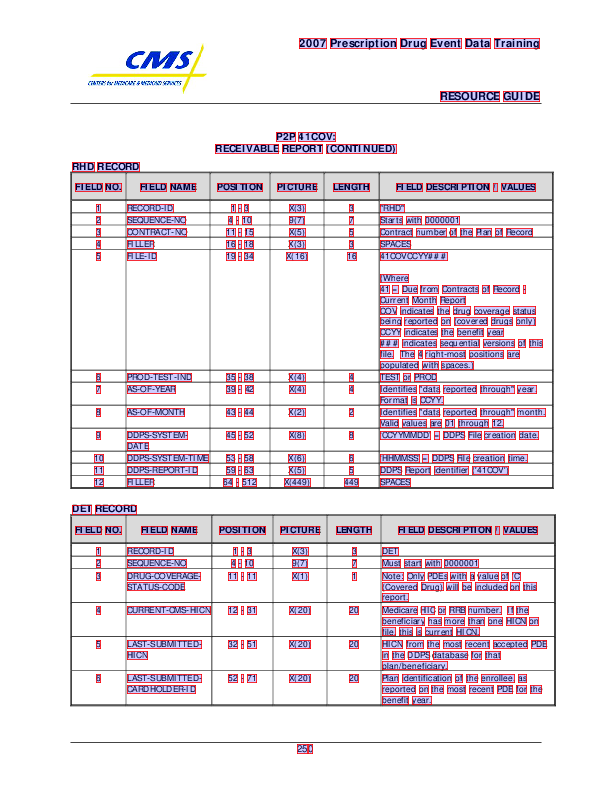

,0,1,2,3,4
0,,,,,LENGTH
1,FIELD NO.,FIELD NAME,POSITION,PICTURE,None
2,,,,,None
3,1,RECORD-ID,1 - 3,X(3),3 \n7 \n1 \n20 \n20 \n20
4,2,SEQUENCE-NO,4 - 10,9(7),None
5,3,DRUG-COVERAGE-\nSTATUS-CODE,11 - 11,X(1),None
6,4,CURRENT-CMS-HICN,12 - 31,X(20),None
7,5,LAST-SUBMITTED-\nHICN,32 - 51,X(20),None
8,6,LAST-SUBMITTED-\nCARDHOLDER-ID,52 - 71,X(20),None


In [41]:
page_x = pdf.pages[303]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_tables()[1])
display(df)

In [42]:
df.columns = [ 'FIELD NO.',
               'FIELD NAME',
               'POSITION',
               'PICTURE',
               'LENGTH',]
df = df[3:].reset_index(drop = True)
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
manual_parse = ['DET','Must start with 0000001','Note: Only PDEs with a value of \'C\' (Covered Drug) will be included on this report.', 'Medicare HIC or RRB number.  If the beneficiary has more than one HICN on file, this is current HICN.','HICN from the most recent accepted PDE in the DDPS database for that plan/beneficiary.', 'Plan identification of the enrollee, as reported on the most recent PDE for the benefit year']
df['FIELD DESCRIPTION / VALUES'] =  pd.Series(manual_parse)
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
bad_index = mid[mid == -1].index
mid[bad_index] = df.loc[bad_index,'POSITION'].str.find(' – ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
df['LENGTH'] =  pd.Series(deret(df.iloc[0,4]))
df = df[[ 'FIELD NO.',
         'FIELD NAME',
         'POSITION',
         'PICTURE',
         'LENGTH',
         'FIELD DESCRIPTION / VALUES',
         'START_POSITION',
         'END_POSITION']]

#non-generic
df['RECORD'] = 'det'
df[['DOCUMENT']] = '41COV'
display(df)
cov41_det1 = df
cms_dfs2 = cms_dfs2 + [cov41_det1]

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD,DOCUMENT
0,1,RECORD-ID,1 - 3,X(3),3,DET,1,3,det,41COV
1,2,SEQUENCE-NO,4 - 10,9(7),7,Must start with 0000001,4,10,det,41COV
2,3,DRUG-COVERAGE-STATUS-CODE,11 - 11,X(1),1,Note: Only PDEs with a value of 'C' (Covered D...,11,11,det,41COV
3,4,CURRENT-CMS-HICN,12 - 31,X(20),20,Medicare HIC or RRB number. If the beneficiar...,12,31,det,41COV
4,5,LAST-SUBMITTED-HICN,32 - 51,X(20),20,HICN from the most recent accepted PDE in the ...,32,51,det,41COV
5,6,LAST-SUBMITTED-CARDHOLDER-ID,52 - 71,X(20),20,"Plan identification of the enrollee, as report...",52,71,det,41COV


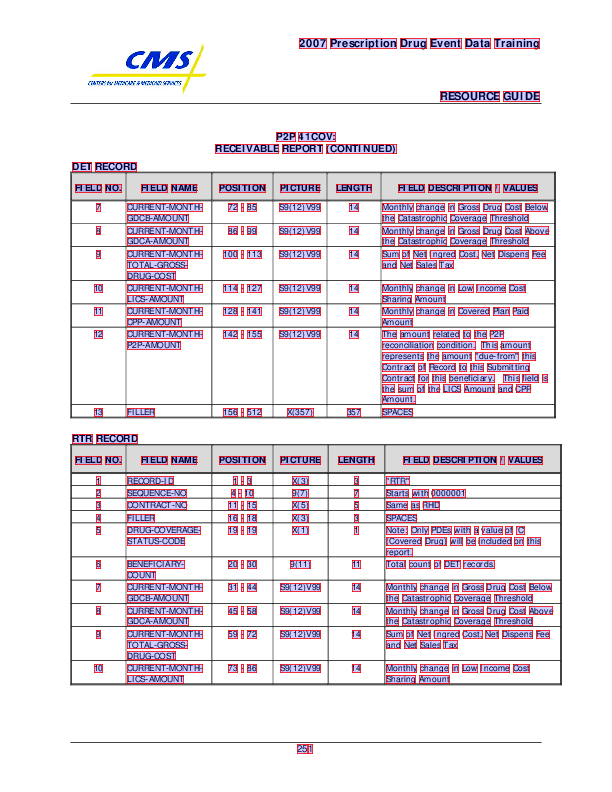

,0,1,2,3,4
0,,,,,LENGTH
1,FIELD NO.,FIELD NAME,POSITION,PICTURE,None
2,,,,,None
3,7,CURRENT-MONTH-\nGDCB-AMOUNT,72 - 85,S9(12)V99,14 \n14 \n14 \n14 \n14 \n14 \n357
4,8,CURRENT-MONTH-\nGDCA-AMOUNT,86 - 99,S9(12)V99,None
5,9,CURRENT-MONTH-\nTOTAL-GROSS-\nDRUG-COST,100 - 113,S9(12)V99,None
6,10,CURRENT-MONTH-\nLICS-AMOUNT,114 - 127,S9(12)V99,None
7,11,CURRENT-MONTH-\nCPP-AMOUNT,128 - 141,S9(12)V99,None
8,12,CURRENT-MONTH-\nP2P-AMOUNT,142 - 155,S9(12)V99,None
9,13,FILLER,156 - 512,X(357),None


In [43]:
page_x = pdf.pages[304]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_tables()[0])
display(df)

In [44]:
df.columns = [ 'FIELD NO.',
               'FIELD NAME',
               'POSITION',
               'PICTURE',
               'LENGTH',]
df = df[3:].reset_index(drop = True)
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
manual_parse = ['Monthly change in Gross Drug Cost Below the Catastrophic Coverage Threshold', 
                'Monthly change in Gross Drug Cost Above the Catastrophic Coverage Threshold', 
                'Sum of Net Ingred Cost, Net Dispens Fee and Net Sales Tax',
                'Low Income Cost Sharing Amount',
                'Covered Plan Paid Amount',
                'The amount related to the P2P reconciliation condition.  This amount represents the amount "due-from" this Contract of Record to this Submitting Contract for this beneficiary.   This field is the sum of the LICS Amount and CPP Amount.', 
                'SPACES']
df['FIELD DESCRIPTION / VALUES'] =  pd.Series(manual_parse)
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
bad_index = mid[mid == -1].index
mid[bad_index] = df.loc[bad_index,'POSITION'].str.find(' – ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
df['LENGTH'] =  pd.Series(deret(df.iloc[0,4]))
df = df[[ 'FIELD NO.',
         'FIELD NAME',
         'POSITION',
         'PICTURE',
         'LENGTH',
         'FIELD DESCRIPTION / VALUES',
         'START_POSITION',
         'END_POSITION']]

#non-generic
df['RECORD'] = 'det'
df[['DOCUMENT']] = '41COV'
display(df)
cov41_det2 = df
cms_dfs2 = cms_dfs2 + [cov41_det2]

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD,DOCUMENT
0,7,CURRENT-MONTH-GDCB-AMOUNT,72 - 85,S9(12)V99,14,Monthly change in Gross Drug Cost Below the Ca...,72,85,det,41COV
1,8,CURRENT-MONTH-GDCA-AMOUNT,86 - 99,S9(12)V99,14,Monthly change in Gross Drug Cost Above the Ca...,86,99,det,41COV
2,9,CURRENT-MONTH-TOTAL-GROSS-DRUG-COST,100 - 113,S9(12)V99,14,"Sum of Net Ingred Cost, Net Dispens Fee and Ne...",100,113,det,41COV
3,10,CURRENT-MONTH-LICS-AMOUNT,114 - 127,S9(12)V99,14,Low Income Cost Sharing Amount,114,127,det,41COV
4,11,CURRENT-MONTH-CPP-AMOUNT,128 - 141,S9(12)V99,14,Covered Plan Paid Amount,128,141,det,41COV
5,12,CURRENT-MONTH-P2P-AMOUNT,142 - 155,S9(12)V99,14,The amount related to the P2P reconciliation c...,142,155,det,41COV
6,13,FILLER,156 - 512,X(357),357,SPACES,156,512,det,41COV


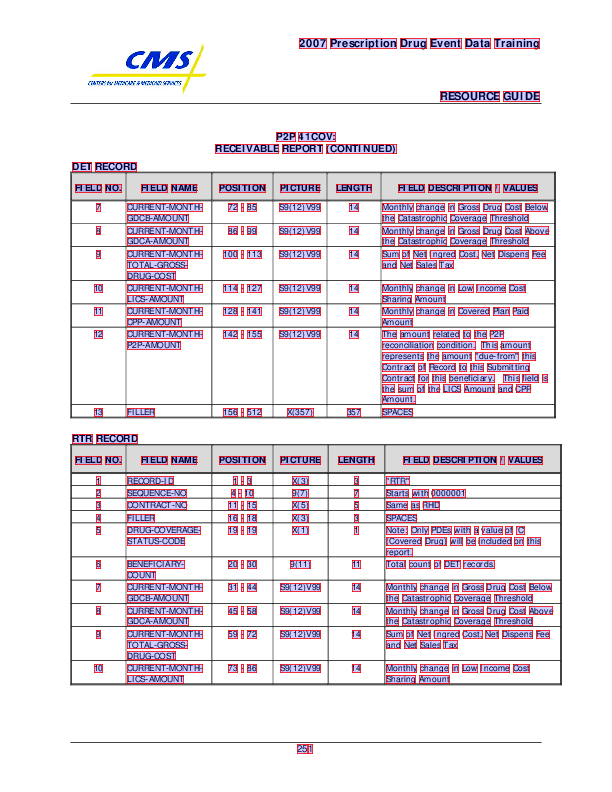

,0,1,2,3,4,5
0,,,,,,FIELD DESCRIPTION / VALUES
1,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,None
2,,,,,,None
3,1,RECORD-ID,1 - 3,X(3),3,"""RTR"" \nStarts with 0000001 \nSame as RHD \nSP..."
4,2,SEQUENCE-NO,4 - 10,9(7),7,None
5,3,CONTRACT-NO,11 - 15,X(5),5,None
6,4,FILLER,16 - 18,X(3),3,None
7,5,DRUG-COVERAGE-\nSTATUS-CODE,19 - 19,X(1),1,None
8,6,BENEFICIARY-\nCOUNT,20 - 30,9(11),11,None
9,7,CURRENT-MONTH-\nGDCB-AMOUNT,31 - 44,S9(12)V99,14,None


In [45]:
page_x = pdf.pages[304]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_tables()[1])
display(df)

In [46]:
df.columns = col_names
df = df[3:].reset_index(drop = True)
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
df['FIELD DESCRIPTION / VALUES'] =  pd.Series(deret(df.iloc[0,5]))
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
bad_index = mid[mid == -1].index
mid[bad_index] = df.loc[bad_index,'POSITION'].str.find(' – ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
#df['LENGTH'] =  pd.Series(deret(df.iloc[0,4]))
df = df[[ 'FIELD NO.',
         'FIELD NAME',
         'POSITION',
         'PICTURE',
         'LENGTH',
         'FIELD DESCRIPTION / VALUES',
         'START_POSITION',
         'END_POSITION']]

#non-generic
df['RECORD'] = 'rtr'
df[['DOCUMENT']] = '41COV'
display(df)
cov41_rtr1 = df
cms_dfs2 = cms_dfs2 + [cov41_rtr1]

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD,DOCUMENT
0,1,RECORD-ID,1 - 3,X(3),3,"""RTR""",1,3,rtr,41COV
1,2,SEQUENCE-NO,4 - 10,9(7),7,Starts with 0000001,4,10,rtr,41COV
2,3,CONTRACT-NO,11 - 15,X(5),5,Same as RHD,11,15,rtr,41COV
3,4,FILLER,16 - 18,X(3),3,SPACES,16,18,rtr,41COV
4,5,DRUG-COVERAGE-STATUS-CODE,19 - 19,X(1),1,Note: Only PDEs with a value of 'C',19,19,rtr,41COV
5,6,BENEFICIARY-COUNT,20 - 30,9(11),11,(Covered Drug) will be included on this,20,30,rtr,41COV
6,7,CURRENT-MONTH-GDCB-AMOUNT,31 - 44,S9(12)V99,14,report.,31,44,rtr,41COV
7,8,CURRENT-MONTH-GDCA-AMOUNT,45 - 58,S9(12)V99,14,Total count of DET records.,45,58,rtr,41COV
8,9,CURRENT-MONTH-TOTAL-GROSS-DRUG-COST,59 - 72,S9(12)V99,14,Monthly change in Gross Drug Cost Below,59,72,rtr,41COV
9,10,CURRENT-MONTH-LICS-AMOUNT,73 - 86,S9(12)V99,14,the Catastrophic Coverage Threshold,73,86,rtr,41COV


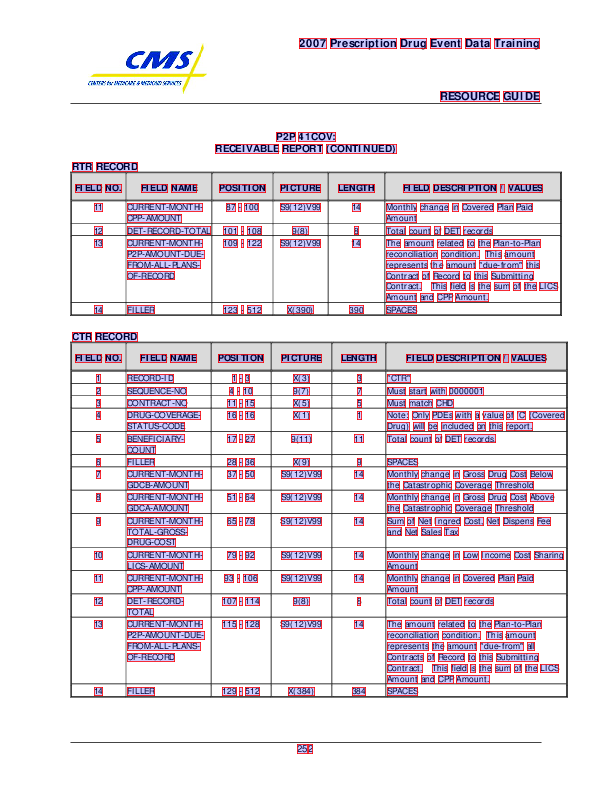

,0,1,2,3,4,5
0,,,,,,FIELD DESCRIPTION / VALUES
1,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,None
2,,,,,,None
3,11,CURRENT-MONTH-\nCPP-AMOUNT,87 - 100,S9(12)V99,14,Monthly change in Covered Plan Paid \nAmount \...
4,12,DET-RECORD-TOTAL,101 - 108,9(8),8,None
5,13,CURRENT-MONTH-\nP2P-AMOUNT-DUE-\nFROM-ALL-PLAN...,109 - 122,S9(12)V99,14,None
6,14,FILLER,123 - 512,X(390),390,None


In [47]:
page_x = pdf.pages[305]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_tables()[0])
display(df)

In [48]:
df.columns = col_names
df = df[3:].reset_index(drop = True)
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
df['FIELD DESCRIPTION / VALUES'] =  pd.Series(deret(df.iloc[0,5]))
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
bad_index = mid[mid == -1].index
mid[bad_index] = df.loc[bad_index,'POSITION'].str.find(' – ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
#df['LENGTH'] =  pd.Series(deret(df.iloc[0,4]))
df = df[[ 'FIELD NO.',
         'FIELD NAME',
         'POSITION',
         'PICTURE',
         'LENGTH',
         'FIELD DESCRIPTION / VALUES',
         'START_POSITION',
         'END_POSITION']]

#non-generic
df['RECORD'] = 'rtr'
df[['DOCUMENT']] = '41COV'
display(df)
cov41_rtr2 = df
cms_dfs2 = cms_dfs2 + [cov41_rtr2]

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD,DOCUMENT
0,11,CURRENT-MONTH-CPP-AMOUNT,87 - 100,S9(12)V99,14,Monthly change in Covered Plan Paid,87,100,rtr,41COV
1,12,DET-RECORD-TOTAL,101 - 108,9(8),8,Amount,101,108,rtr,41COV
2,13,CURRENT-MONTH-P2P-AMOUNT-DUE-FROM-ALL-PLANS-OF...,109 - 122,S9(12)V99,14,Total count of DET records,109,122,rtr,41COV
3,14,FILLER,123 - 512,X(390),390,The amount related to the Plan-to-Plan,123,512,rtr,41COV


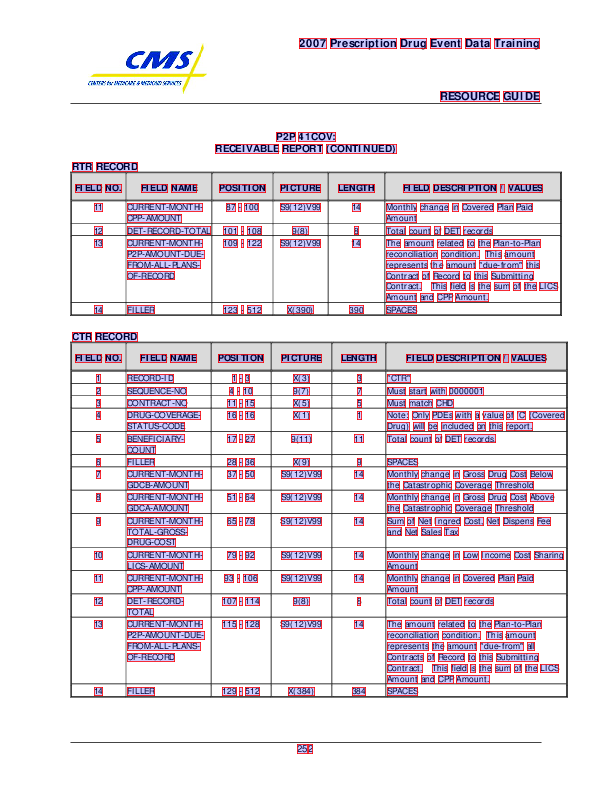

,0,1,2,3,4,5
0,,,,,,
1,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES
2,,,,,,
3,1,RECORD-ID,1 - 3,X(3),3,"""CTR"""
4,2,SEQUENCE-NO,4 - 10,9(7),7,Must start with 0000001
5,3,CONTRACT-NO,11 - 15,X(5),5,Must match CHD
6,4,DRUG-COVERAGE-\nSTATUS-CODE,16 - 16,X(1),1,Note: Only PDEs with a value of 'C' (Covered \...
7,5,BENEFICIARY-\nCOUNT,17 - 27,9(11),11,Total count of DET records.
8,6,FILLER,28 - 36,X(9),9,SPACES
9,7,CURRENT-MONTH-\nGDCB-AMOUNT,37 - 50,S9(12)V99,14,Monthly change in Gross Drug Cost Below \nthe ...


In [49]:
page_x = pdf.pages[305]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_tables()[1])
display(df)

In [50]:
df.columns = col_names
df = df[3:].reset_index(drop = True)
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
#df['FIELD DESCRIPTION / VALUES'] =  pd.Series(deret(df.iloc[0,5]))
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
bad_index = mid[mid == -1].index
mid[bad_index] = df.loc[bad_index,'POSITION'].str.find(' – ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
#df['LENGTH'] =  pd.Series(deret(df.iloc[0,4]))
df = df[[ 'FIELD NO.',
         'FIELD NAME',
         'POSITION',
         'PICTURE',
         'LENGTH',
         'FIELD DESCRIPTION / VALUES',
         'START_POSITION',
         'END_POSITION']]
df.loc[13,'FIELD DESCRIPTION / VALUES']='SPACES'
#non-generic
df['RECORD'] = 'ctr'
df[['DOCUMENT']] = '41COV'
display(df)
cov41_ctr = df
cms_dfs2 = cms_dfs2 + [cov41_ctr]

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD,DOCUMENT
0,1,RECORD-ID,1 - 3,X(3),3,"""CTR""",1,3,ctr,41COV
1,2,SEQUENCE-NO,4 - 10,9(7),7,Must start with 0000001,4,10,ctr,41COV
2,3,CONTRACT-NO,11 - 15,X(5),5,Must match CHD,11,15,ctr,41COV
3,4,DRUG-COVERAGE-STATUS-CODE,16 - 16,X(1),1,Note: Only PDEs with a value of 'C' (Covered D...,16,16,ctr,41COV
4,5,BENEFICIARY-COUNT,17 - 27,9(11),11,Total count of DET records.,17,27,ctr,41COV
5,6,FILLER,28 - 36,X(9),9,SPACES,28,36,ctr,41COV
6,7,CURRENT-MONTH-GDCB-AMOUNT,37 - 50,S9(12)V99,14,Monthly change in Gross Drug Cost Below the Ca...,37,50,ctr,41COV
7,8,CURRENT-MONTH-GDCA-AMOUNT,51 - 64,S9(12)V99,14,Monthly change in Gross Drug Cost Above the Ca...,51,64,ctr,41COV
8,9,CURRENT-MONTH-TOTAL-GROSS-DRUG-COST,65 - 78,S9(12)V99,14,"Sum of Net Ingred Cost, Net Dispens Fee and Ne...",65,78,ctr,41COV
9,10,CURRENT-MONTH-LICS-AMOUNT,79 - 92,S9(12)V99,14,Monthly change in Low Income Cost Sharing Amount,79,92,ctr,41COV


In [51]:
cms_dfs2

[   FIELD NO.        FIELD NAME  POSITION PICTURE LENGTH  \
 0          1         RECORD-ID     1 - 3    X(3)      3   
 1          2       SEQUENCE-NO    4 - 10    9(7)      7   
 2          3       CONTRACT-NO   11 - 15    X(5)      5   
 3          4           FILE-ID   16 - 31   X(16)     16   
 4          5     PROD-TEST-IND   32 - 35    X(4)      4   
 5          6        AS-OF-YEAR   36 - 39    X(4)      4   
 6          7       AS-OF-MONTH   40 - 41    X(2)      2   
 7          8  DDPS-SYSTEM-DATE   42 - 49    X(8)      8   
 8          9  DDPS-SYSTEM-TIME   50 - 55    X(6)      6   
 9         10    DDPS-REPORT-ID   56 - 60    X(5)      5   
 10        11            FILLER  61 - 512  X(452)    452   
 
                            FIELD DESCRIPTION / VALUES START_POSITION  \
 0                                               "CHD"              1   
 1                                 Starts with 0000001              4   
 2                          Submitting Contract number     

In [52]:
cms_df = cms_df.append(cms_dfs2)
cms_df = cms_df.reset_index(drop=True)


In [53]:
cms_df

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD,DOCUMENT
0,1,RECORD-ID,1 - 3,X(3),3,"""CHD""",1,3,chd,"40COV, 40ENH, 40OTC"
1,2,SEQUENCE-NO,4 - 10,9(7),7,Starts with 0000001,4,10,chd,"40COV, 40ENH, 40OTC"
2,3,CONTRACT-NO,11 - 15,X(5),5,Submitting Contract number,11,15,chd,"40COV, 40ENH, 40OTC"
3,4,FILE-ID,16 - 31,X(16),16,"40COVCCYY###, 40ENHCCYY### or 40OTCCCYY### (W...",16,31,chd,"40COV, 40ENH, 40OTC"
4,5,PROD-TEST-IND,32 - 35,X(4),4,TEST or PROD,32,35,chd,"40COV, 40ENH, 40OTC"
...,...,...,...,...,...,...,...,...,...,...
178,10,CURRENT-MONTH-LICS-AMOUNT,79 - 92,S9(12)V99,14,Monthly change in Low Income Cost Sharing Amount,79,92,ctr,41COV
179,11,CURRENT-MONTH-CPP-AMOUNT,93 - 106,S9(12)V99,14,Monthly change in Covered Plan Paid Amount,93,106,ctr,41COV
180,12,DET-RECORD-TOTAL,107 - 114,9(8),8,Total count of DET records,107,114,ctr,41COV
181,13,CURRENT-MONTH-P2P-AMOUNT-DUE-FROM-ALL-PLANS-OF...,115 - 128,S9(12)V99,14,The amount related to the Plan-to-Plan reconci...,115,128,ctr,41COV


In [54]:
cms_df.to_csv('cms_df.csv', index=False)
cms_df.to_excel('cms_df.xlsx', index=False)

In [55]:
cms_df.isnull().any()

FIELD NO.                     False
FIELD NAME                    False
POSITION                      False
PICTURE                       False
LENGTH                        False
FIELD DESCRIPTION / VALUES    False
START_POSITION                False
END_POSITION                  False
RECORD                        False
DOCUMENT                      False
dtype: bool

In [56]:
cms_dfs3 = []

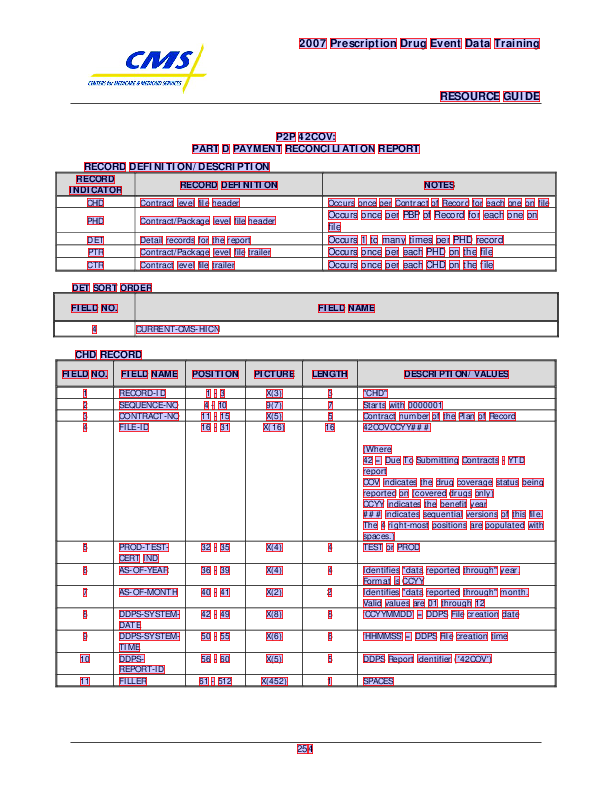

,0,1,2,3,4,5
0,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,DESCRIPTION/VALUES
1,1,RECORD-ID,1 - 3,X(3),3,"""CHD"" \nStarts with 0000001 \nContract number ..."
2,2,SEQUENCE-NO,4 - 10,9(7),7,None
3,3,CONTRACT-NO,11 - 15,X(5),5,None
4,4,FILE-ID,16 - 31,X(16),16,None
5,5,PROD-TEST-\nCERT IND,32 - 35,X(4),4,None
6,6,AS-OF-YEAR,36 - 39,X(4),4,None
7,7,AS-OF-MONTH,40 - 41,X(2),2,None
8,8,DDPS-SYSTEM-\nDATE,42 - 49,X(8),8,None
9,9,DDPS-SYSTEM-\nTIME,50 - 55,X(6),6,None


In [57]:
page_x = pdf.pages[308]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_tables()[2])
display(df)

In [58]:
df.columns = col_names
df = df[1:].reset_index(drop = True)
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
df['FIELD DESCRIPTION / VALUES'] =  pd.Series(deret(df.iloc[0,5]))
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
bad_index = mid[mid == -1].index
mid[bad_index] = df.loc[bad_index,'POSITION'].str.find(' – ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
#df['LENGTH'] =  pd.Series(deret(df.iloc[0,4]))
df = df[[ 'FIELD NO.',
         'FIELD NAME',
         'POSITION',
         'PICTURE',
         'LENGTH',
         'FIELD DESCRIPTION / VALUES',
         'START_POSITION',
         'END_POSITION']]

#non-generic
df['RECORD'] = 'chd'
df[['DOCUMENT']] = '42COV'
display(df)
cov42_chd = df
cms_dfs3 = cms_dfs3 + [cov42_chd]

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD,DOCUMENT
0,1,RECORD-ID,1 - 3,X(3),3,"""CHD""",1,3,chd,42COV
1,2,SEQUENCE-NO,4 - 10,9(7),7,Starts with 0000001,4,10,chd,42COV
2,3,CONTRACT-NO,11 - 15,X(5),5,Contract number of the Plan of Record,11,15,chd,42COV
3,4,FILE-ID,16 - 31,X(16),16,42COVCCYY###,16,31,chd,42COV
4,5,PROD-TEST-CERT IND,32 - 35,X(4),4,(Where,32,35,chd,42COV
5,6,AS-OF-YEAR,36 - 39,X(4),4,42 = Due To Submitting Contracts - YTD,36,39,chd,42COV
6,7,AS-OF-MONTH,40 - 41,X(2),2,report,40,41,chd,42COV
7,8,DDPS-SYSTEM-DATE,42 - 49,X(8),8,COV indicates the drug coverage status being,42,49,chd,42COV
8,9,DDPS-SYSTEM-TIME,50 - 55,X(6),6,reported on (covered drugs only),50,55,chd,42COV
9,10,DDPS-REPORT-ID,56 - 60,X(5),5,CCYY indicates the benefit year,56,60,chd,42COV


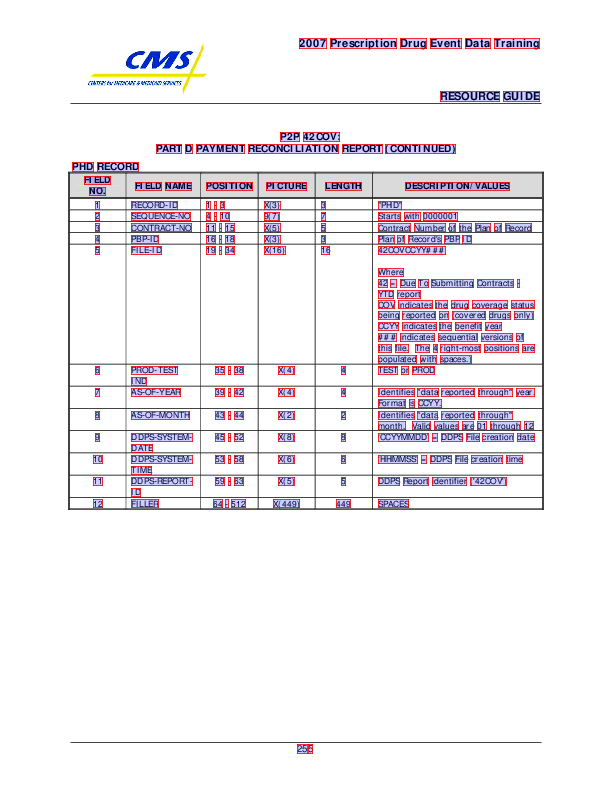

,0,1,2,3,4,5,6,7
0,,FIELD,,FIELD NAME,POSITION,PICTURE,LENGTH,DESCRIPTION/VALUES
1,None,NO.,None,None,None,None,None,None
2,1,None,None,RECORD-ID,1 - 3,X(3),3,"""PHD"""
3,2,None,None,SEQUENCE-NO,4 - 10,9(7),7,Starts with 0000001
4,3,None,None,CONTRACT-NO,11 - 15,X(5),5,Contract Number of the Plan of Record
5,4,None,None,PBP-ID,16 - 18,X(3),3,Plan of Record's PBP ID
6,5,None,None,FILE-ID,19 - 34,X(16),16,42COVCCYY### \n \nWhere \n42 = Due To Submitt...
7,6,None,None,PROD-TEST \nIND,35 - 38,X(4),4,TEST or PROD
8,7,None,None,AS-OF-YEAR,39 - 42,X(4),4,"Identifies ""data reported through"" year. \nFo..."
9,8,None,None,AS-OF-MONTH,43 - 44,X(2),2,"Identifies ""data reported through"" \nmonth. V..."


In [59]:
page_x = pdf.pages[309]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_tables()[0])
display(df)

In [60]:

df = df.iloc[2:,[0,3,4,5,6,7]].reset_index(drop = True)
df.columns = col_names
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
#df['FIELD DESCRIPTION / VALUES'] =  pd.Series(deret(df.iloc[0,5]))
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
bad_index = mid[mid == -1].index
mid[bad_index] = df.loc[bad_index,'POSITION'].str.find(' – ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
#df['LENGTH'] =  pd.Series(deret(df.iloc[0,4]))
df = df[[ 'FIELD NO.',
         'FIELD NAME',
         'POSITION',
         'PICTURE',
         'LENGTH',
         'FIELD DESCRIPTION / VALUES',
         'START_POSITION',
         'END_POSITION']]

#non-generic
df['RECORD'] = 'phd'
df[['DOCUMENT']] = '42COV'
display(df)
cov42_phd = df
cms_dfs3 = cms_dfs3 + [cov42_phd]

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD,DOCUMENT
0,1,RECORD-ID,1 - 3,X(3),3,"""PHD""",1,3,phd,42COV
1,2,SEQUENCE-NO,4 - 10,9(7),7,Starts with 0000001,4,10,phd,42COV
2,3,CONTRACT-NO,11 - 15,X(5),5,Contract Number of the Plan of Record,11,15,phd,42COV
3,4,PBP-ID,16 - 18,X(3),3,Plan of Record's PBP ID,16,18,phd,42COV
4,5,FILE-ID,19 - 34,X(16),16,42COVCCYY### Where 42 = Due To Submitting Co...,19,34,phd,42COV
5,6,PROD-TEST IND,35 - 38,X(4),4,TEST or PROD,35,38,phd,42COV
6,7,AS-OF-YEAR,39 - 42,X(4),4,"Identifies ""data reported through"" year. Form...",39,42,phd,42COV
7,8,AS-OF-MONTH,43 - 44,X(2),2,"Identifies ""data reported through"" month. Val...",43,44,phd,42COV
8,9,DDPS-SYSTEM-DATE,45 - 52,X(8),8,‘CCYYMMDD’ = DDPS File creation date,45,52,phd,42COV
9,10,DDPS-SYSTEM-TIME,53 - 58,X(6),6,‘HHMMSS’ = DDPS File creation time,53,58,phd,42COV


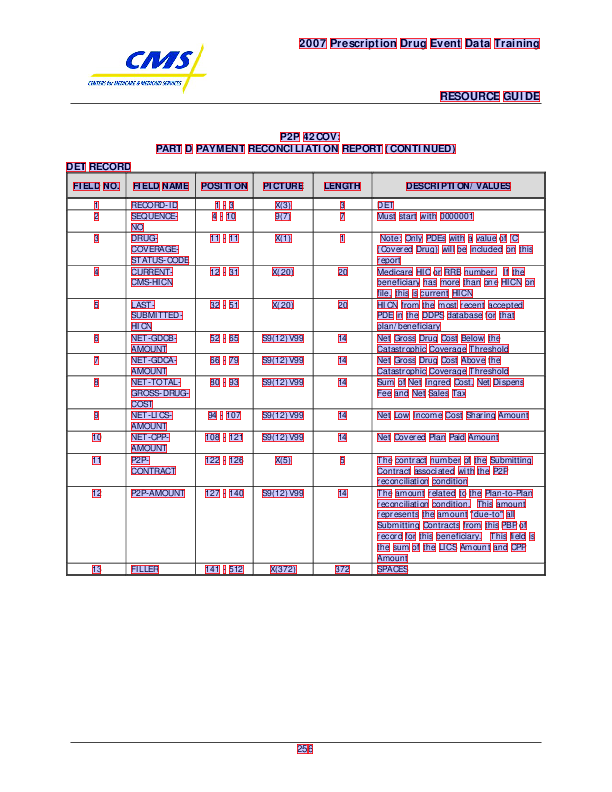

,0,1,2,3,4,5
0,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,DESCRIPTION/VALUES
1,1,RECORD-ID,1 - 3,X(3),3,DET
2,2,SEQUENCE-\nNO,4 - 10,9(7),7,Must start with 0000001
3,3,DRUG-\nCOVERAGE-\nSTATUS-CODE,11 - 11,X(1),1,Note: Only PDEs with a value of 'C' \n(Covered...
4,4,CURRENT-\nCMS-HICN,12 - 31,X(20),20,Medicare HIC or RRB number. If the \nbenefici...
5,5,LAST-\nSUBMITTED-\nHICN,32 - 51,X(20),20,HICN from the most recent accepted \nPDE in th...
6,6,NET-GDCB-\nAMOUNT,52 - 65,S9(12)V99,14,Net Gross Drug Cost Below the \nCatastrophic C...
7,7,NET-GDCA-\nAMOUNT,66 - 79,S9(12)V99,14,Net Gross Drug Cost Above the \nCatastrophic C...
8,8,NET-TOTAL-\nGROSS-DRUG-\nCOST,80 - 93,S9(12)V99,14,"Sum of Net Ingred Cost, Net Dispens \nFee and ..."
9,9,NET-LICS-\nAMOUNT,94 - 107,S9(12)V99,14,Net Low Income Cost Sharing Amount


In [61]:
page_x = pdf.pages[310]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_tables()[0])
display(df)

In [62]:

df = df.iloc[1:,:].reset_index(drop = True)
df.columns = col_names
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
#df['FIELD DESCRIPTION / VALUES'] =  pd.Series(deret(df.iloc[0,5]))
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
bad_index = mid[mid == -1].index
mid[bad_index] = df.loc[bad_index,'POSITION'].str.find(' – ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
#df['LENGTH'] =  pd.Series(deret(df.iloc[0,4]))
df = df[[ 'FIELD NO.',
         'FIELD NAME',
         'POSITION',
         'PICTURE',
         'LENGTH',
         'FIELD DESCRIPTION / VALUES',
         'START_POSITION',
         'END_POSITION']]

#non-generic
df['RECORD'] = 'det'
df[['DOCUMENT']] = '42COV'
display(df)
cov42_det = df
cms_dfs3 = cms_dfs3 + [cov42_det]

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD,DOCUMENT
0,1,RECORD-ID,1 - 3,X(3),3,DET,1,3,det,42COV
1,2,SEQUENCE-NO,4 - 10,9(7),7,Must start with 0000001,4,10,det,42COV
2,3,DRUG-COVERAGE-STATUS-CODE,11 - 11,X(1),1,Note: Only PDEs with a value of 'C' (Covered D...,11,11,det,42COV
3,4,CURRENT-CMS-HICN,12 - 31,X(20),20,Medicare HIC or RRB number. If the beneficiar...,12,31,det,42COV
4,5,LAST-SUBMITTED-HICN,32 - 51,X(20),20,HICN from the most recent accepted PDE in the ...,32,51,det,42COV
5,6,NET-GDCB-AMOUNT,52 - 65,S9(12)V99,14,Net Gross Drug Cost Below the Catastrophic Cov...,52,65,det,42COV
6,7,NET-GDCA-AMOUNT,66 - 79,S9(12)V99,14,Net Gross Drug Cost Above the Catastrophic Cov...,66,79,det,42COV
7,8,NET-TOTAL-GROSS-DRUG-COST,80 - 93,S9(12)V99,14,"Sum of Net Ingred Cost, Net Dispens Fee and Ne...",80,93,det,42COV
8,9,NET-LICS-AMOUNT,94 - 107,S9(12)V99,14,Net Low Income Cost Sharing Amount,94,107,det,42COV
9,10,NET-CPP-AMOUNT,108 - 121,S9(12)V99,14,Net Covered Plan Paid Amount,108,121,det,42COV


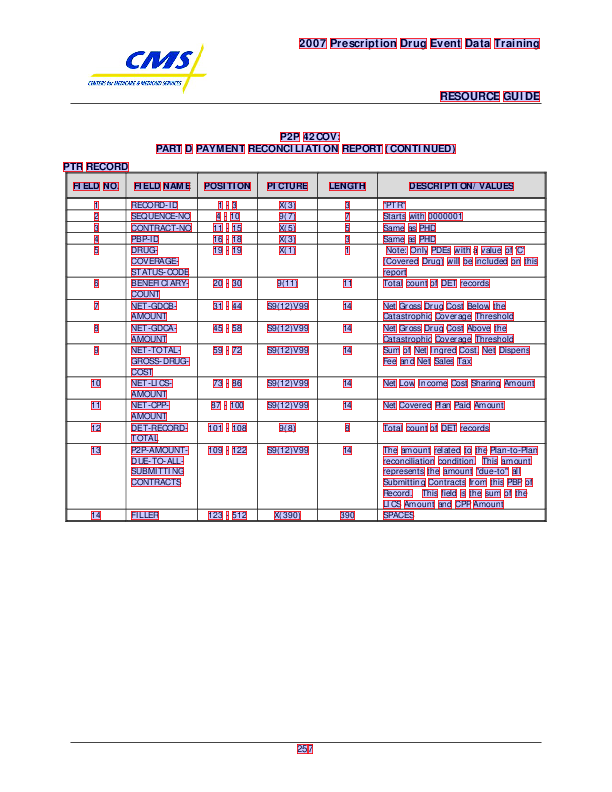

,0,1,2,3,4,5
0,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,DESCRIPTION/VALUES
1,1,RECORD-ID,1 - 3,X(3),3,"""PTR"""
2,2,SEQUENCE-NO,4 - 10,9(7),7,Starts with 0000001
3,3,CONTRACT-NO,11 - 15,X(5),5,Same as PHD
4,4,PBP-ID,16 - 18,X(3),3,Same as PHD
5,5,DRUG-\nCOVERAGE-\nSTATUS-CODE,19 - 19,X(1),1,Note: Only PDEs with a value of 'C' \n(Covered...
6,6,BENEFICIARY-\nCOUNT,20 - 30,9(11),11,Total count of DET records
7,7,NET-GDCB-\nAMOUNT,31 - 44,S9(12)V99,14,Net Gross Drug Cost Below the \nCatastrophic C...
8,8,NET-GDCA-\nAMOUNT,45 - 58,S9(12)V99,14,Net Gross Drug Cost Above the \nCatastrophic C...
9,9,NET-TOTAL-\nGROSS-DRUG-\nCOST,59 - 72,S9(12)V99,14,"Sum of Net Ingred Cost, Net Dispens \nFee and ..."


In [63]:
page_x = pdf.pages[311]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_tables()[0])
display(df)

In [64]:

df = df.iloc[1:,:].reset_index(drop = True)
df.columns = col_names
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
#df['FIELD DESCRIPTION / VALUES'] =  pd.Series(deret(df.iloc[0,5]))
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
bad_index = mid[mid == -1].index
mid[bad_index] = df.loc[bad_index,'POSITION'].str.find(' – ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
#df['LENGTH'] =  pd.Series(deret(df.iloc[0,4]))
df = df[[ 'FIELD NO.',
         'FIELD NAME',
         'POSITION',
         'PICTURE',
         'LENGTH',
         'FIELD DESCRIPTION / VALUES',
         'START_POSITION',
         'END_POSITION']]

#non-generic
df['RECORD'] = 'ptr'
df[['DOCUMENT']] = '42COV'
display(df)
cov42_ptr = df
cms_dfs3 = cms_dfs3 + [cov42_ptr]

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD,DOCUMENT
0,1,RECORD-ID,1 - 3,X(3),3,"""PTR""",1,3,ptr,42COV
1,2,SEQUENCE-NO,4 - 10,9(7),7,Starts with 0000001,4,10,ptr,42COV
2,3,CONTRACT-NO,11 - 15,X(5),5,Same as PHD,11,15,ptr,42COV
3,4,PBP-ID,16 - 18,X(3),3,Same as PHD,16,18,ptr,42COV
4,5,DRUG-COVERAGE-STATUS-CODE,19 - 19,X(1),1,Note: Only PDEs with a value of 'C' (Covered D...,19,19,ptr,42COV
5,6,BENEFICIARY-COUNT,20 - 30,9(11),11,Total count of DET records,20,30,ptr,42COV
6,7,NET-GDCB-AMOUNT,31 - 44,S9(12)V99,14,Net Gross Drug Cost Below the Catastrophic Cov...,31,44,ptr,42COV
7,8,NET-GDCA-AMOUNT,45 - 58,S9(12)V99,14,Net Gross Drug Cost Above the Catastrophic Cov...,45,58,ptr,42COV
8,9,NET-TOTAL-GROSS-DRUG-COST,59 - 72,S9(12)V99,14,"Sum of Net Ingred Cost, Net Dispens Fee and Ne...",59,72,ptr,42COV
9,10,NET-LICS-AMOUNT,73 - 86,S9(12)V99,14,Net Low Income Cost Sharing Amount,73,86,ptr,42COV


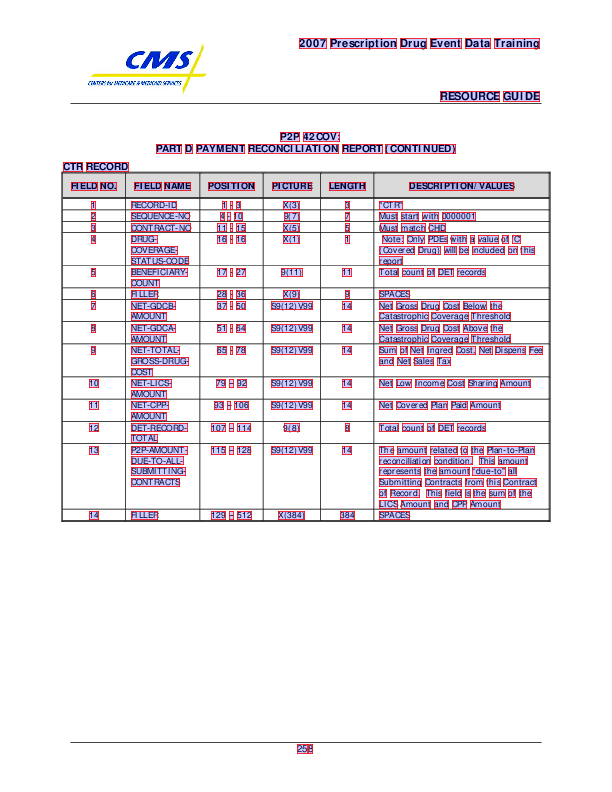

,0,1,2,3,4,5
0,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,DESCRIPTION/VALUES
1,1,RECORD-ID,1 - 3,X(3),3,"""CTR"""
2,2,SEQUENCE-NO,4 - 10,9(7),7,Must start with 0000001
3,3,CONTRACT-NO,11 - 15,X(5),5,Must match CHD
4,4,DRUG-\nCOVERAGE-\nSTATUS-CODE,16 - 16,X(1),1,Note: Only PDEs with a value of 'C' \n(Covered...
5,5,BENEFICIARY-\nCOUNT,17 - 27,9(11),11,Total count of DET records
6,6,FILLER,28 - 36,X(9),9,SPACES
7,7,NET-GDCB-\nAMOUNT,37 - 50,S9(12)V99,14,Net Gross Drug Cost Below the \nCatastrophic C...
8,8,NET-GDCA-\nAMOUNT,51 - 64,S9(12)V99,14,Net Gross Drug Cost Above the \nCatastrophic C...
9,9,NET-TOTAL-\nGROSS-DRUG-\nCOST,65 - 78,S9(12)V99,14,"Sum of Net Ingred Cost, Net Dispens Fee \nand ..."


In [65]:
page_x = pdf.pages[312]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_tables()[0])
display(df)


In [66]:
df = df.iloc[1:,:].reset_index(drop = True)
df.columns = col_names
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
#df['FIELD DESCRIPTION / VALUES'] =  pd.Series(deret(df.iloc[0,5]))
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
bad_index = mid[mid == -1].index
mid[bad_index] = df.loc[bad_index,'POSITION'].str.find(' – ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
#df['LENGTH'] =  pd.Series(deret(df.iloc[0,4]))
df = df[[ 'FIELD NO.',
         'FIELD NAME',
         'POSITION',
         'PICTURE',
         'LENGTH',
         'FIELD DESCRIPTION / VALUES',
         'START_POSITION',
         'END_POSITION']]

#non-generic
df['RECORD'] = 'ctr'
df[['DOCUMENT']] = '42COV'
display(df)
cov42_ctr = df
cms_dfs3 = cms_dfs3 + [cov42_ctr]

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD,DOCUMENT
0,1,RECORD-ID,1 - 3,X(3),3,"""CTR""",1,3,ctr,42COV
1,2,SEQUENCE-NO,4 - 10,9(7),7,Must start with 0000001,4,10,ctr,42COV
2,3,CONTRACT-NO,11 - 15,X(5),5,Must match CHD,11,15,ctr,42COV
3,4,DRUG-COVERAGE-STATUS-CODE,16 - 16,X(1),1,Note: Only PDEs with a value of 'C' (Covered D...,16,16,ctr,42COV
4,5,BENEFICIARY-COUNT,17 - 27,9(11),11,Total count of DET records,17,27,ctr,42COV
5,6,FILLER,28 - 36,X(9),9,SPACES,28,36,ctr,42COV
6,7,NET-GDCB-AMOUNT,37 - 50,S9(12)V99,14,Net Gross Drug Cost Below the Catastrophic Cov...,37,50,ctr,42COV
7,8,NET-GDCA-AMOUNT,51 - 64,S9(12)V99,14,Net Gross Drug Cost Above the Catastrophic Cov...,51,64,ctr,42COV
8,9,NET-TOTAL-GROSS-DRUG-COST,65 - 78,S9(12)V99,14,"Sum of Net Ingred Cost, Net Dispens Fee and Ne...",65,78,ctr,42COV
9,10,NET-LICS-AMOUNT,79 – 92,S9(12)V99,14,Net Low Income Cost Sharing Amount,79,92,ctr,42COV


In [67]:
cms_dfs4 = []

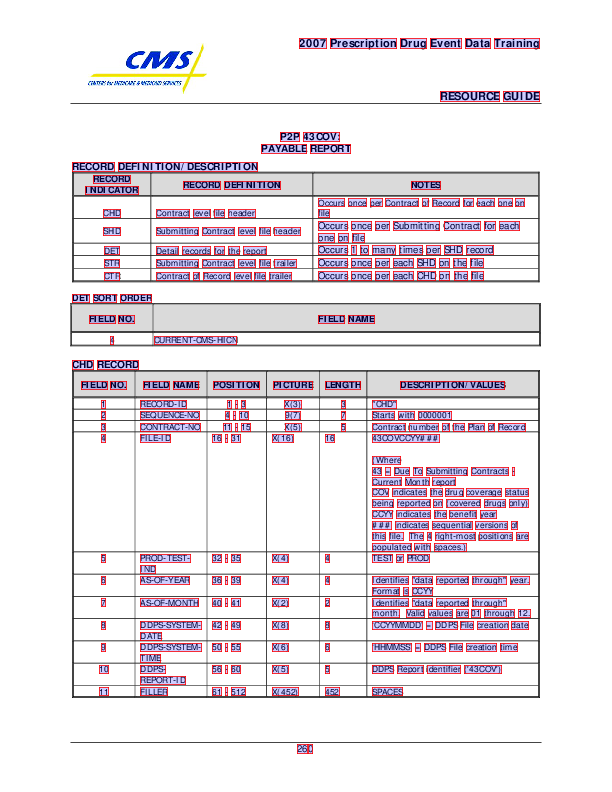

,0,1,2,3,4,5
0,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,DESCRIPTION/VALUES
1,1,RECORD-ID,1 - 3,X(3),3,"""CHD"""
2,2,SEQUENCE-NO,4 - 10,9(7),7,Starts with 0000001
3,3,CONTRACT-NO,11 - 15,X(5),5,Contract number of the Plan of Record
4,4,FILE-ID,16 - 31,X(16),16,43COVCCYY### \n \n(Where \n43 = Due To Submit...
5,5,PROD-TEST-\nIND,32 - 35,X(4),4,TEST or PROD
6,6,AS-OF-YEAR,36 - 39,X(4),4,"Identifies ""data reported through"" year. \nFo..."
7,7,AS-OF-MONTH,40 - 41,X(2),2,"Identifies ""data reported through"" \nmonth. V..."
8,8,DDPS-SYSTEM-\nDATE,42 - 49,X(8),8,‘CCYYMMDD’ = DDPS File creation date
9,9,DDPS-SYSTEM-\nTIME,50 - 55,X(6),6,‘HHMMSS’ = DDPS File creation time


In [68]:
page_x = pdf.pages[316]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_tables()[2])
display(df)



In [69]:
df = df.iloc[1:,:].reset_index(drop = True)
df.columns = col_names
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
#df['FIELD DESCRIPTION / VALUES'] =  pd.Series(deret(df.iloc[0,5]))
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
bad_index = mid[mid == -1].index
mid[bad_index] = df.loc[bad_index,'POSITION'].str.find(' – ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
#df['LENGTH'] =  pd.Series(deret(df.iloc[0,4]))
df = df[[ 'FIELD NO.',
         'FIELD NAME',
         'POSITION',
         'PICTURE',
         'LENGTH',
         'FIELD DESCRIPTION / VALUES',
         'START_POSITION',
         'END_POSITION']]

#non-generic
df['RECORD'] = 'chd'
df[['DOCUMENT']] = '43COV'
display(df)
cov43_chd = df
cms_dfs4 = cms_dfs4 + [cov43_chd]

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD,DOCUMENT
0,1,RECORD-ID,1 - 3,X(3),3,"""CHD""",1,3,chd,43COV
1,2,SEQUENCE-NO,4 - 10,9(7),7,Starts with 0000001,4,10,chd,43COV
2,3,CONTRACT-NO,11 - 15,X(5),5,Contract number of the Plan of Record,11,15,chd,43COV
3,4,FILE-ID,16 - 31,X(16),16,43COVCCYY### (Where 43 = Due To Submitting C...,16,31,chd,43COV
4,5,PROD-TEST-IND,32 - 35,X(4),4,TEST or PROD,32,35,chd,43COV
5,6,AS-OF-YEAR,36 - 39,X(4),4,"Identifies ""data reported through"" year. Form...",36,39,chd,43COV
6,7,AS-OF-MONTH,40 - 41,X(2),2,"Identifies ""data reported through"" month. Val...",40,41,chd,43COV
7,8,DDPS-SYSTEM-DATE,42 - 49,X(8),8,‘CCYYMMDD’ = DDPS File creation date,42,49,chd,43COV
8,9,DDPS-SYSTEM-TIME,50 - 55,X(6),6,‘HHMMSS’ = DDPS File creation time,50,55,chd,43COV
9,10,DDPS-REPORT-ID,56 - 60,X(5),5,DDPS Report identifier ('43COV'),56,60,chd,43COV


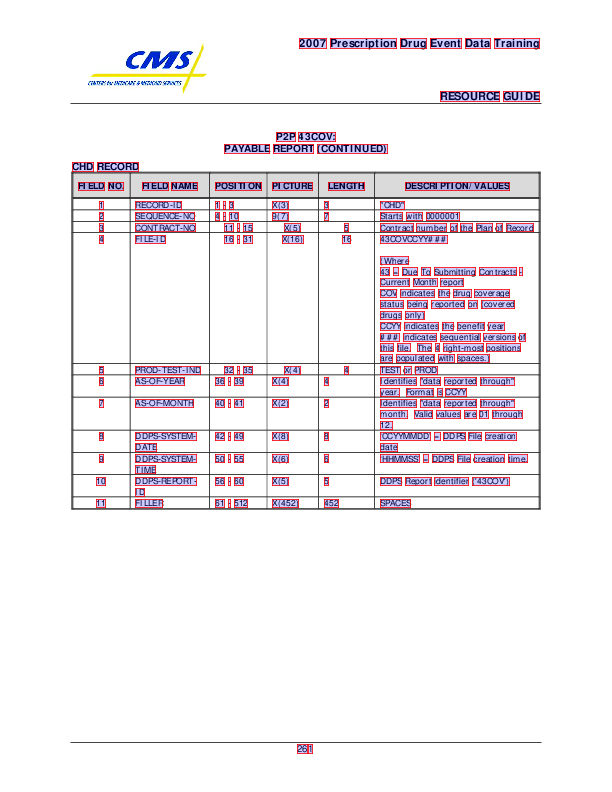

,0,1,2,3,4,5
0,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,DESCRIPTION/VALUES
1,1,RECORD-ID,1 - 3,X(3),3,"""CHD"""
2,2,SEQUENCE-NO,4 - 10,9(7),7,Starts with 0000001
3,3,CONTRACT-NO,11 - 15,X(5),5,Contract number of the Plan of Record
4,4,FILE-ID,16 - 31,X(16),16,43COVCCYY### \n \n(Where \n43 = Due To Submit...
5,5,PROD-TEST-IND,32 - 35,X(4),4,TEST or PROD
6,6,AS-OF-YEAR,36 - 39,X(4),4,"Identifies ""data reported through"" \nyear. Fo..."
7,7,AS-OF-MONTH,40 - 41,X(2),2,"Identifies ""data reported through"" \nmonth. V..."
8,8,DDPS-SYSTEM-\nDATE,42 - 49,X(8),8,‘CCYYMMDD’ = DDPS File creation \ndate
9,9,DDPS-SYSTEM-\nTIME,50 - 55,X(6),6,‘HHMMSS’ = DDPS File creation time.


In [70]:
page_x = pdf.pages[317]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_tables()[0])
display(df)

In [71]:
df = df.iloc[1:,:].reset_index(drop = True)
df.columns = col_names
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
#df['FIELD DESCRIPTION / VALUES'] =  pd.Series(deret(df.iloc[0,5]))
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
bad_index = mid[mid == -1].index
mid[bad_index] = df.loc[bad_index,'POSITION'].str.find(' – ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
#df['LENGTH'] =  pd.Series(deret(df.iloc[0,4]))
df = df[[ 'FIELD NO.',
         'FIELD NAME',
         'POSITION',
         'PICTURE',
         'LENGTH',
         'FIELD DESCRIPTION / VALUES',
         'START_POSITION',
         'END_POSITION']]

#non-generic
df['RECORD'] = 'shd?'
df[['DOCUMENT']] = '43COV'
display(df)
cov43_shd = df
cms_dfs4 = cms_dfs4 + [cov43_shd]

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD,DOCUMENT
0,1,RECORD-ID,1 - 3,X(3),3,"""CHD""",1,3,shd?,43COV
1,2,SEQUENCE-NO,4 - 10,9(7),7,Starts with 0000001,4,10,shd?,43COV
2,3,CONTRACT-NO,11 - 15,X(5),5,Contract number of the Plan of Record,11,15,shd?,43COV
3,4,FILE-ID,16 - 31,X(16),16,43COVCCYY### (Where 43 = Due To Submitting C...,16,31,shd?,43COV
4,5,PROD-TEST-IND,32 - 35,X(4),4,TEST or PROD,32,35,shd?,43COV
5,6,AS-OF-YEAR,36 - 39,X(4),4,"Identifies ""data reported through"" year. Form...",36,39,shd?,43COV
6,7,AS-OF-MONTH,40 - 41,X(2),2,"Identifies ""data reported through"" month. Val...",40,41,shd?,43COV
7,8,DDPS-SYSTEM-DATE,42 - 49,X(8),8,‘CCYYMMDD’ = DDPS File creation date,42,49,shd?,43COV
8,9,DDPS-SYSTEM-TIME,50 - 55,X(6),6,‘HHMMSS’ = DDPS File creation time.,50,55,shd?,43COV
9,10,DDPS-REPORT-ID,56 - 60,X(5),5,DDPS Report identifier ('43COV'),56,60,shd?,43COV


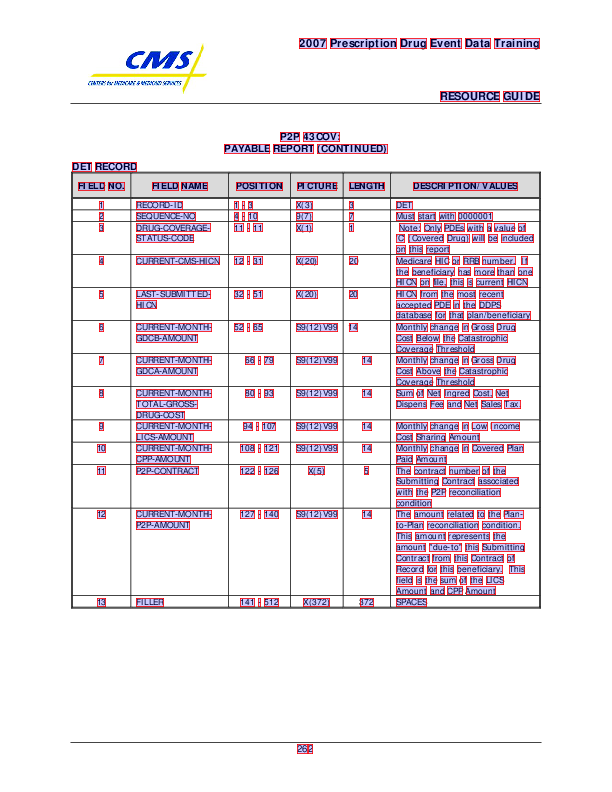

,0,1,2,3,4,5
0,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,DESCRIPTION/VALUES
1,1,RECORD-ID,1 - 3,X(3),3,DET
2,2,SEQUENCE-NO,4 - 10,9(7),7,Must start with 0000001
3,3,DRUG-COVERAGE-\nSTATUS-CODE,11 - 11,X(1),1,Note: Only PDEs with a value of \n'C' (Covered...
4,4,CURRENT-CMS-HICN,12 - 31,X(20),20,Medicare HIC or RRB number. If \nthe benefici...
5,5,LAST-SUBMITTED-\nHICN,32 - 51,X(20),20,HICN from the most recent \naccepted PDE in th...
6,6,CURRENT-MONTH-\nGDCB-AMOUNT,52 - 65,S9(12)V99,14,Monthly change in Gross Drug \nCost Below the ...
7,7,CURRENT-MONTH-\nGDCA-AMOUNT,66 - 79,S9(12)V99,14,Monthly change in Gross Drug \nCost Above the ...
8,8,CURRENT-MONTH-\nTOTAL-GROSS-\nDRUG-COST,80 - 93,S9(12)V99,14,"Sum of Net Ingred Cost, Net \nDispens Fee and ..."
9,9,CURRENT-MONTH-\nLICS-AMOUNT,94 - 107,S9(12)V99,14,Monthly change in Low Income \nCost Sharing Am...


In [72]:
page_x = pdf.pages[318]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_tables()[0])
display(df)

In [73]:
df = df.iloc[1:,:].reset_index(drop = True)
df.columns = col_names
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
#df['FIELD DESCRIPTION / VALUES'] =  pd.Series(deret(df.iloc[0,5]))
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
bad_index = mid[mid == -1].index
mid[bad_index] = df.loc[bad_index,'POSITION'].str.find(' – ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
#df['LENGTH'] =  pd.Series(deret(df.iloc[0,4]))
df = df[[ 'FIELD NO.',
         'FIELD NAME',
         'POSITION',
         'PICTURE',
         'LENGTH',
         'FIELD DESCRIPTION / VALUES',
         'START_POSITION',
         'END_POSITION']]

#non-generic
df['RECORD'] = 'det'
df[['DOCUMENT']] = '43COV'
display(df)
cov43_det = df
cms_dfs4 = cms_dfs4 + [cov43_det]

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD,DOCUMENT
0,1,RECORD-ID,1 - 3,X(3),3,DET,1,3,det,43COV
1,2,SEQUENCE-NO,4 - 10,9(7),7,Must start with 0000001,4,10,det,43COV
2,3,DRUG-COVERAGE-STATUS-CODE,11 - 11,X(1),1,Note: Only PDEs with a value of 'C' (Covered D...,11,11,det,43COV
3,4,CURRENT-CMS-HICN,12 - 31,X(20),20,Medicare HIC or RRB number. If the beneficiar...,12,31,det,43COV
4,5,LAST-SUBMITTED-HICN,32 - 51,X(20),20,HICN from the most recent accepted PDE in the ...,32,51,det,43COV
5,6,CURRENT-MONTH-GDCB-AMOUNT,52 - 65,S9(12)V99,14,Monthly change in Gross Drug Cost Below the Ca...,52,65,det,43COV
6,7,CURRENT-MONTH-GDCA-AMOUNT,66 - 79,S9(12)V99,14,Monthly change in Gross Drug Cost Above the Ca...,66,79,det,43COV
7,8,CURRENT-MONTH-TOTAL-GROSS-DRUG-COST,80 - 93,S9(12)V99,14,"Sum of Net Ingred Cost, Net Dispens Fee and Ne...",80,93,det,43COV
8,9,CURRENT-MONTH-LICS-AMOUNT,94 - 107,S9(12)V99,14,Monthly change in Low Income Cost Sharing Amount,94,107,det,43COV
9,10,CURRENT-MONTH-CPP-AMOUNT,108 - 121,S9(12)V99,14,Monthly change in Covered Plan Paid Amount,108,121,det,43COV


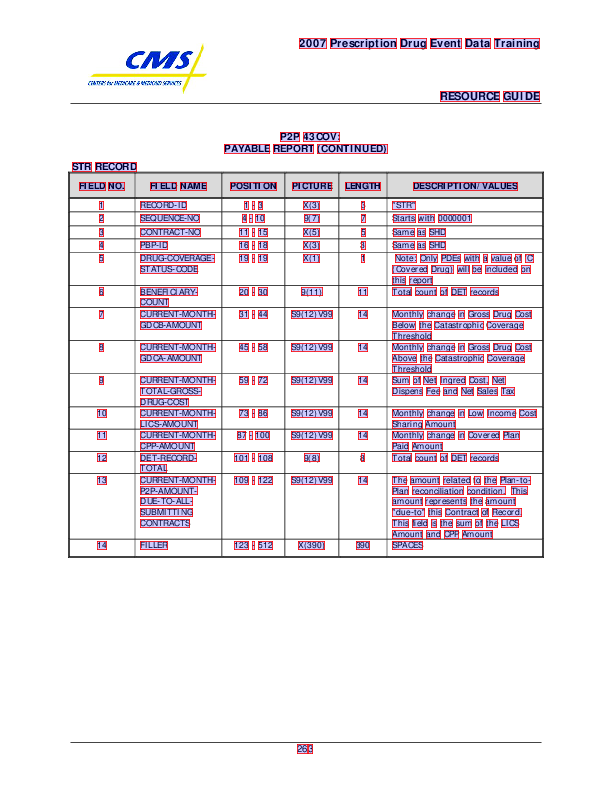

,0,1,2,3,4,5
0,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,DESCRIPTION/VALUES
1,1,RECORD-ID,1 - 3,X(3),3,"""STR"""
2,2,SEQUENCE-NO,4 - 10,9(7),7,Starts with 0000001
3,3,CONTRACT-NO,11 - 15,X(5),5,Same as SHD
4,4,PBP-ID,16 - 18,X(3),3,Same as SHD
5,5,DRUG-COVERAGE-\nSTATUS-CODE,19 - 19,X(1),1,Note: Only PDEs with a value of 'C' \n(Covered...
6,6,BENEFICIARY-\nCOUNT,20 - 30,9(11),11,Total count of DET records
7,7,CURRENT-MONTH-\nGDCB-AMOUNT,31 - 44,S9(12)V99,14,Monthly change in Gross Drug Cost \nBelow the ...
8,8,CURRENT-MONTH-\nGDCA-AMOUNT,45 - 58,S9(12)V99,14,Monthly change in Gross Drug Cost \nAbove the ...
9,9,CURRENT-MONTH-\nTOTAL-GROSS-\nDRUG-COST,59 - 72,S9(12)V99,14,"Sum of Net Ingred Cost, Net \nDispens Fee and ..."


In [74]:
page_x = pdf.pages[319]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_tables()[0])
display(df)


In [75]:
df = df.iloc[1:,:].reset_index(drop = True)
df.columns = col_names
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
#df['FIELD DESCRIPTION / VALUES'] =  pd.Series(deret(df.iloc[0,5]))
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
bad_index = mid[mid == -1].index
mid[bad_index] = df.loc[bad_index,'POSITION'].str.find(' – ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
#df['LENGTH'] =  pd.Series(deret(df.iloc[0,4]))
df = df[[ 'FIELD NO.',
         'FIELD NAME',
         'POSITION',
         'PICTURE',
         'LENGTH',
         'FIELD DESCRIPTION / VALUES',
         'START_POSITION',
         'END_POSITION']]
df.loc[13,'LENGTH']='390'
#non-generic
df['RECORD'] = 'str'
df[['DOCUMENT']] = '43COV'
display(df)
cov43_str = df
cms_dfs4 = cms_dfs4 + [cov43_str]

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD,DOCUMENT
0,1,RECORD-ID,1 - 3,X(3),3,"""STR""",1,3,str,43COV
1,2,SEQUENCE-NO,4 - 10,9(7),7,Starts with 0000001,4,10,str,43COV
2,3,CONTRACT-NO,11 - 15,X(5),5,Same as SHD,11,15,str,43COV
3,4,PBP-ID,16 - 18,X(3),3,Same as SHD,16,18,str,43COV
4,5,DRUG-COVERAGE-STATUS-CODE,19 - 19,X(1),1,Note: Only PDEs with a value of 'C' (Covered D...,19,19,str,43COV
5,6,BENEFICIARY-COUNT,20 - 30,9(11),11,Total count of DET records,20,30,str,43COV
6,7,CURRENT-MONTH-GDCB-AMOUNT,31 - 44,S9(12)V99,14,Monthly change in Gross Drug Cost Below the Ca...,31,44,str,43COV
7,8,CURRENT-MONTH-GDCA-AMOUNT,45 - 58,S9(12)V99,14,Monthly change in Gross Drug Cost Above the Ca...,45,58,str,43COV
8,9,CURRENT-MONTH-TOTAL-GROSS-DRUG-COST,59 - 72,S9(12)V99,14,"Sum of Net Ingred Cost, Net Dispens Fee and Ne...",59,72,str,43COV
9,10,CURRENT-MONTH-LICS-AMOUNT,73 - 86,S9(12)V99,14,Monthly change in Low Income Cost Sharing Amount,73,86,str,43COV


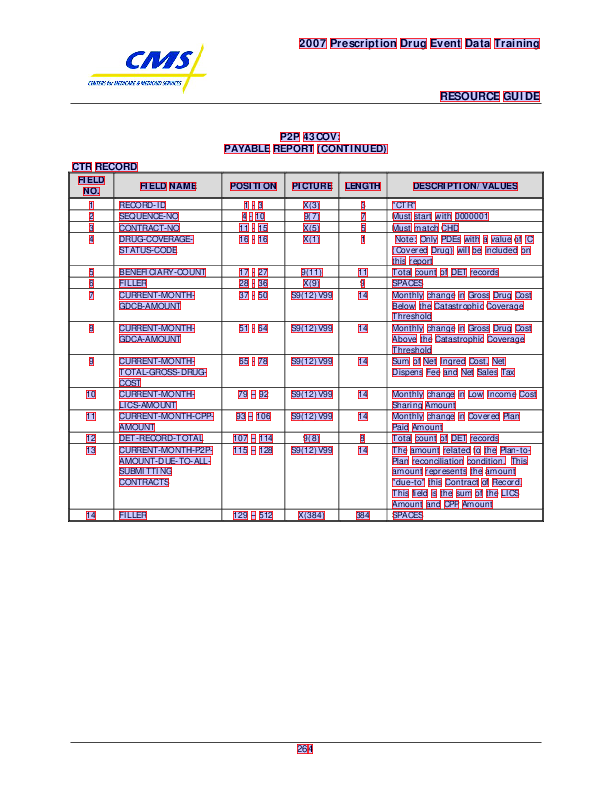

,0,1,2,3,4,5,6,7
0,,FIELD,,FIELD NAME,POSITION,PICTURE,LENGTH,DESCRIPTION/VALUES
1,None,NO.,None,None,None,None,None,None
2,1,None,None,RECORD-ID,1 - 3,X(3),3,"""CTR"""
3,2,None,None,SEQUENCE-NO,4 - 10,9(7),7,Must start with 0000001
4,3,None,None,CONTRACT-NO,11 - 15,X(5),5,Must match CHD
5,4,None,None,DRUG-COVERAGE-\nSTATUS-CODE,16 - 16,X(1),1,Note: Only PDEs with a value of 'C' \n(Covered...
6,5,None,None,BENEFICIARY-COUNT,17 - 27,9(11),11,Total count of DET records
7,6,None,None,FILLER,28 - 36,X(9),9,SPACES
8,7,None,None,CURRENT-MONTH-\nGDCB-AMOUNT,37 - 50,S9(12)V99,14,Monthly change in Gross Drug Cost \nBelow the ...
9,8,None,None,CURRENT-MONTH-\nGDCA-AMOUNT,51 - 64,S9(12)V99,14,Monthly change in Gross Drug Cost \nAbove the ...


In [76]:
page_x = pdf.pages[320]

#to_image() function requires 2 dependencies
#requires imagemagick on path 
#imagemagick then requires ghostscript to be installed (but not required to be on path)
im = page_x.to_image() 
display(im.draw_rects(page_x.extract_words()))
df = pd.DataFrame(page_x.extract_tables()[0])
display(df)


In [77]:
df = df.iloc[2:,[0,3,4,5,6,7]].reset_index(drop = True)
df.columns = col_names
df.loc[:,'FIELD NAME'] = df['FIELD NAME'].str.replace("\n","")
#df['FIELD DESCRIPTION / VALUES'] =  pd.Series(deret(df.iloc[0,5]))
df.loc[:,'FIELD DESCRIPTION / VALUES'] = df['FIELD DESCRIPTION / VALUES'].str.replace("\n","")
mid = df['POSITION'].str.find(' - ')
bad_index = mid[mid == -1].index
mid[bad_index] = df.loc[bad_index,'POSITION'].str.find(' – ')
df['START_POSITION'] = pd.Series([x[:y] for x , y in zip(df['POSITION'], mid)])
df['END_POSITION'] = pd.Series([x[y+3:] for x , y in zip(df['POSITION'], mid)])
#df['LENGTH'] =  pd.Series(deret(df.iloc[0,4]))
df = df[[ 'FIELD NO.',
         'FIELD NAME',
         'POSITION',
         'PICTURE',
         'LENGTH',
         'FIELD DESCRIPTION / VALUES',
         'START_POSITION',
         'END_POSITION']]
df.loc[13,'LENGTH']='384'
#non-generic
df['RECORD'] = 'ctr'
df[['DOCUMENT']] = '43COV'
display(df)
cov43_ctr = df
cms_dfs4 = cms_dfs4 + [cov43_ctr]

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD,DOCUMENT
0,1,RECORD-ID,1 - 3,X(3),3,"""CTR""",1,3,ctr,43COV
1,2,SEQUENCE-NO,4 - 10,9(7),7,Must start with 0000001,4,10,ctr,43COV
2,3,CONTRACT-NO,11 - 15,X(5),5,Must match CHD,11,15,ctr,43COV
3,4,DRUG-COVERAGE-STATUS-CODE,16 - 16,X(1),1,Note: Only PDEs with a value of 'C' (Covered D...,16,16,ctr,43COV
4,5,BENEFICIARY-COUNT,17 - 27,9(11),11,Total count of DET records,17,27,ctr,43COV
5,6,FILLER,28 - 36,X(9),9,SPACES,28,36,ctr,43COV
6,7,CURRENT-MONTH-GDCB-AMOUNT,37 - 50,S9(12)V99,14,Monthly change in Gross Drug Cost Below the Ca...,37,50,ctr,43COV
7,8,CURRENT-MONTH-GDCA-AMOUNT,51 - 64,S9(12)V99,14,Monthly change in Gross Drug Cost Above the Ca...,51,64,ctr,43COV
8,9,CURRENT-MONTH-TOTAL-GROSS-DRUG-COST,65 - 78,S9(12)V99,14,"Sum of Net Ingred Cost, Net Dispens Fee and Ne...",65,78,ctr,43COV
9,10,CURRENT-MONTH-LICS-AMOUNT,79 – 92,S9(12)V99,14,Monthly change in Low Income Cost Sharing Amount,79,92,ctr,43COV


In [78]:
cms_df = cms_df.append(cms_dfs3).append(cms_dfs4)
cms_df = cms_df.reset_index(drop=True)


In [79]:
cms_df

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD,DOCUMENT
0,1,RECORD-ID,1 - 3,X(3),3,"""CHD""",1,3,chd,"40COV, 40ENH, 40OTC"
1,2,SEQUENCE-NO,4 - 10,9(7),7,Starts with 0000001,4,10,chd,"40COV, 40ENH, 40OTC"
2,3,CONTRACT-NO,11 - 15,X(5),5,Submitting Contract number,11,15,chd,"40COV, 40ENH, 40OTC"
3,4,FILE-ID,16 - 31,X(16),16,"40COVCCYY###, 40ENHCCYY### or 40OTCCCYY### (W...",16,31,chd,"40COV, 40ENH, 40OTC"
4,5,PROD-TEST-IND,32 - 35,X(4),4,TEST or PROD,32,35,chd,"40COV, 40ENH, 40OTC"
...,...,...,...,...,...,...,...,...,...,...
305,10,CURRENT-MONTH-LICS-AMOUNT,79 – 92,S9(12)V99,14,Monthly change in Low Income Cost Sharing Amount,79,92,ctr,43COV
306,11,CURRENT-MONTH-CPP-AMOUNT,93 – 106,S9(12)V99,14,Monthly change in Covered Plan Paid Amount,93,106,ctr,43COV
307,12,DET-RECORD-TOTAL,107 – 114,9(8),8,Total count of DET records,107,114,ctr,43COV
308,13,CURRENT-MONTH-P2P-AMOUNT-DUE-TO-ALL-SUBMITTING...,115 – 128,S9(12)V99,14,The amount related to the Plan-to-Plan reconci...,115,128,ctr,43COV


In [80]:
cms_df.isnull().any()

FIELD NO.                     False
FIELD NAME                    False
POSITION                      False
PICTURE                       False
LENGTH                        False
FIELD DESCRIPTION / VALUES    False
START_POSITION                False
END_POSITION                  False
RECORD                        False
DOCUMENT                      False
dtype: bool

In [81]:
cms_df.to_csv('cms_df.csv', index=False)
cms_df.to_excel('cms_df.xlsx', index=False)

In [82]:
cms_df[~cms_df['START_POSITION'].str.isnumeric() | ~cms_df['END_POSITION'].str.isnumeric() | ~cms_df['LENGTH'].str.isnumeric()]

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD,DOCUMENT


In [83]:
cols = ['FIELD NO.', 'POSITION', 'PICTURE', 'LENGTH','FIELD DESCRIPTION / VALUES', 'START_POSITION', 'END_POSITION', 'RECORD']
df_flat = cms_df.loc[[]].copy().reset_index(drop=True)
docs = ["40COV, 40ENH, 40OTC", "41COV", "42COV", "43COV"]
for docset in docs:
    df= cms_df[cms_df['DOCUMENT']==docset]
    fields = df['FIELD NAME'].unique()
    for field in fields:
        sub_df=df[df['FIELD NAME']==field]
        row_x = sub_df[:1].copy().reset_index(drop=True)
        for col in cols:
            row_x.loc[0,col] = sub_df[col].str.cat(sep=', ')
        df_flat = df_flat.append(row_x)
df_flat = df_flat.reset_index(drop=True)

In [84]:
df_flat

,FIELD NO.,FIELD NAME,POSITION,PICTURE,LENGTH,FIELD DESCRIPTION / VALUES,START_POSITION,END_POSITION,RECORD,DOCUMENT
0,"1, 1, 1, 1, 1",RECORD-ID,"1 - 3, 1 - 3, 1 - 3, 1 - 3, 1 - 3","X(3), X(3), X(3), X(3), X(3)","3, 3, 3, 3, 3","""CHD"", ""PHD"", DET, ""PTR"", ""CTR""","1, 1, 1, 1, 1","3, 3, 3, 3, 3","chd, phd, det, ptr, ctr","40COV, 40ENH, 40OTC"
1,"2, 2, 2, 2, 2",SEQUENCE-NO,"4 - 10, 4 - 10, 4 - 10, 4 - 10, 4 - 10","9(7), 9(7), 9(7), 9(7), 9(7)","7, 7, 7, 7, 7","Starts with 0000001, Starts with 0000001, Must...","4, 4, 4, 4, 4","10, 10, 10, 10, 10","chd, phd, det, ptr, ctr","40COV, 40ENH, 40OTC"
2,"3, 3, 3, 3",CONTRACT-NO,"11 - 15, 11 - 15, 11 - 15, 11 - 15","X(5), X(5), X(5), X(5)","5, 5, 5, 5","Submitting Contract number, Submitting Contrac...","11, 11, 11, 11","15, 15, 15, 15","chd, phd, ptr, ctr","40COV, 40ENH, 40OTC"
3,"4, 5",FILE-ID,"16 - 31, 19 - 34","X(16), X(16)","16, 16","40COVCCYY###, 40ENHCCYY### or 40OTCCCYY### (W...","16, 19","31, 34","chd, phd","40COV, 40ENH, 40OTC"
4,"5, 6",PROD-TEST-IND,"32 - 35, 35 - 38","X(4), X(4)","4, 4","TEST or PROD, TEST or PROD","32, 35","35, 38","chd, phd","40COV, 40ENH, 40OTC"
...,...,...,...,...,...,...,...,...,...,...
120,12,CURRENT-MONTH-P2P-AMOUNT,127 - 140,S9(12)V99,14,The amount related to the Plan-to-Plan reconci...,127,140,det,43COV
121,4,PBP-ID,16 - 18,X(3),3,Same as SHD,16,18,str,43COV
122,"6, 5",BENEFICIARY-COUNT,"20 - 30, 17 - 27","9(11), 9(11)","11, 11","Total count of DET records, Total count of DET...","20, 17","30, 27","str, ctr",43COV
123,"12, 12",DET-RECORD-TOTAL,"101 - 108, 107 – 114","9(8), 9(8)","8, 8","Total count of DET records, Total count of DET...","101, 107","108, 114","str, ctr",43COV


In [85]:
df_flat.to_csv('df_flat.csv', index=False)
df_flat.to_excel('df_flat.xlsx', index=False)